## Problem Statement

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Importing necessary libraries

In [3]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading the dataset

In [ ]:
dfs = pd.read_csv('DATA/Sparkling.csv',parse_dates=True,index_col='YearMonth')
dfs.head().to_csv('spark_head.csv')
dfs.head()

In [6]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## Exploratory Data Analysis (EDA)

## Check for Missing Values

In [8]:
dfs.isna().sum()

Sparkling    0
dtype: int64

## Plot the Time Series

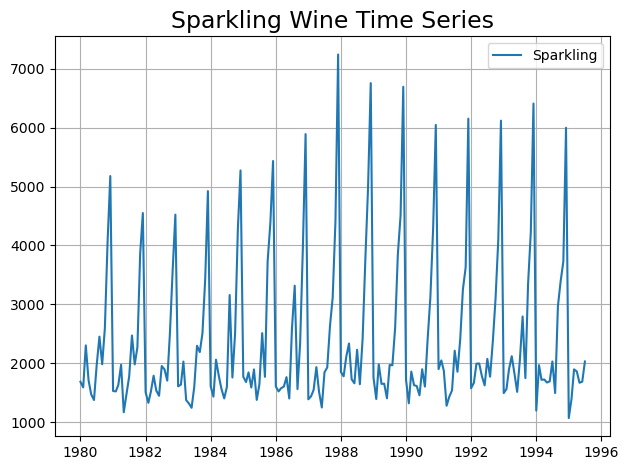

In [9]:
# SPARKLING TIME SERIES

plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()
plt.savefig('spark_ts.jpg', bbox_inches='tight');

## Check the basic measures of descriptive statistics of the Time Series

In [10]:
round(dfs.describe().T,3).to_csv('spark_describe.csv')
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

## Plot Box-plot Monthwise

In [11]:
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('spark_monthwise_box.jpg', bbox_inches='tight');

## Additive Decomposition

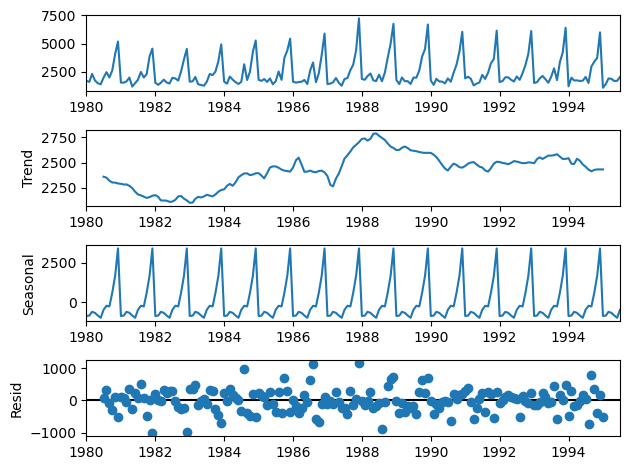

In [12]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');

In [13]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


<AxesSubplot:xlabel='YearMonth'>

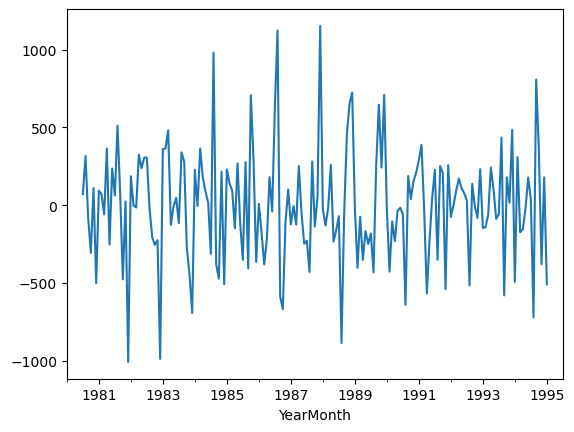

In [14]:
residual.plot()

In [15]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

## Multiplicative Decomposition 

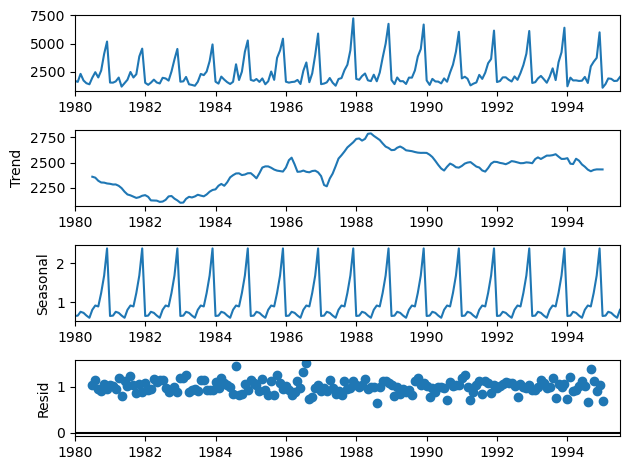

In [16]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [17]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

<AxesSubplot:xlabel='YearMonth'>

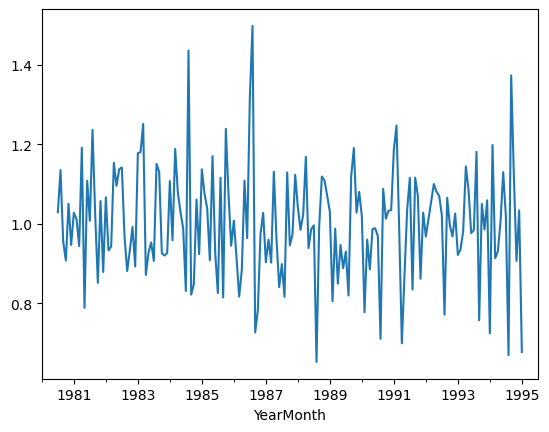

In [19]:
residual.plot()

In [18]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828963

## Split the data into train and test and plot the training and test data.

In [21]:
# SPARKLING DATA SPLIT

strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [22]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [23]:
from IPython.display import display

In [24]:
# SPARKLING DATA TRAIN AND TEST

print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

strain.to_csv('spark_train.csv')
stest.to_csv('spark_test.csv')

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

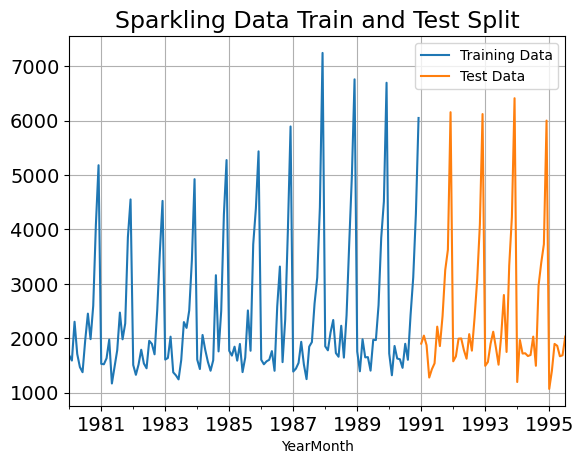

In [25]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES

strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()

## Building models and comparing the accuracy metrics.

## Model 1: Linear Regression 

In [26]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [27]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Now that our training and test data has been modified, let us go ahead use Linear regression to build the model on the training data and test the model on the test data.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

In [32]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

### Defining the functions for calculating the accuracy metrics.

In [33]:
from sklearn import metrics

## Model Evaluation

In [34]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [57]:
resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Sparkling
RegressionOnTime          1389.135175

## Model 2: Naive Approach

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [43]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [44]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [45]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

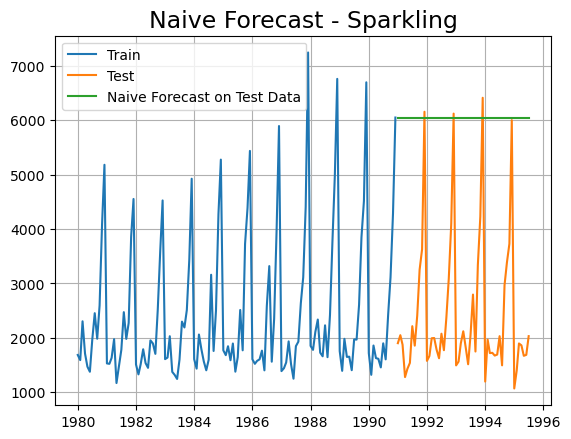

In [46]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_naive.jpg', bbox_inches='tight');

## Model Evaluation

In [47]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [53]:
resultsDf1

Test RMSE Sparkling
RegressionOnTime          1389.135175

In [54]:
resultsDf1 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])
resultsDf1

Test RMSE Sparkling
NaiveModel          3864.279352

In [67]:
resultsDf2 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf2

Test RMSE Sparkling
RegressionOnTime          1389.135175
NaiveModel                3864.279352

## Model 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [61]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [62]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

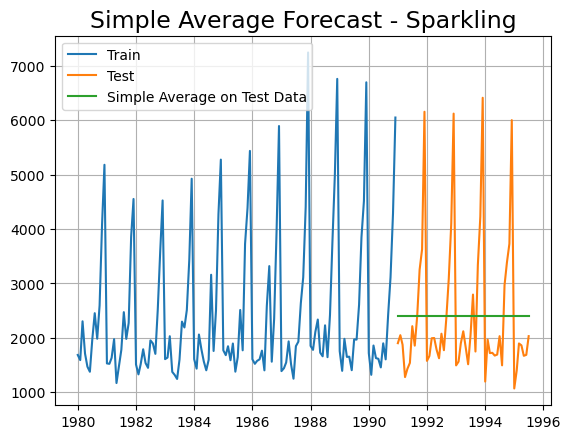

In [63]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

## Model Evaluation

In [64]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))


For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [68]:
resultsDf3= pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf3

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [69]:
resultsDf4 = pd.concat([resultsDf2, resultsDf3], axis=0)
resultsDf4

Test RMSE Sparkling
RegressionOnTime            1389.135175
NaiveModel                  3864.279352
SimpleAverageModel          1275.081804

In [70]:
resultsDf = resultsDf4.copy()
resultsDf.to_csv('results_sa.csv')
resultsDf

Test RMSE Sparkling
RegressionOnTime            1389.135175
NaiveModel                  3864.279352
SimpleAverageModel          1275.081804

## Model 4: Moving Average(MA)

In [71]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [72]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

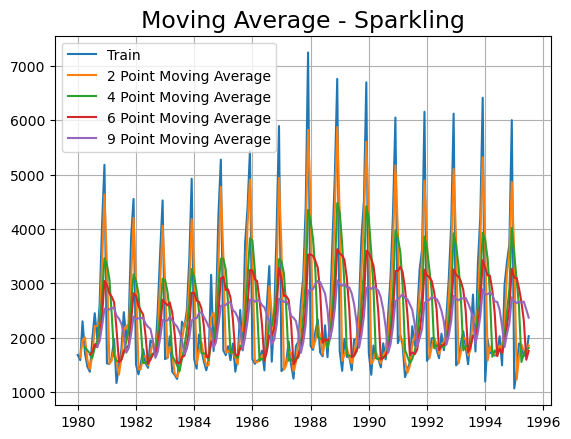

In [74]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

In [75]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

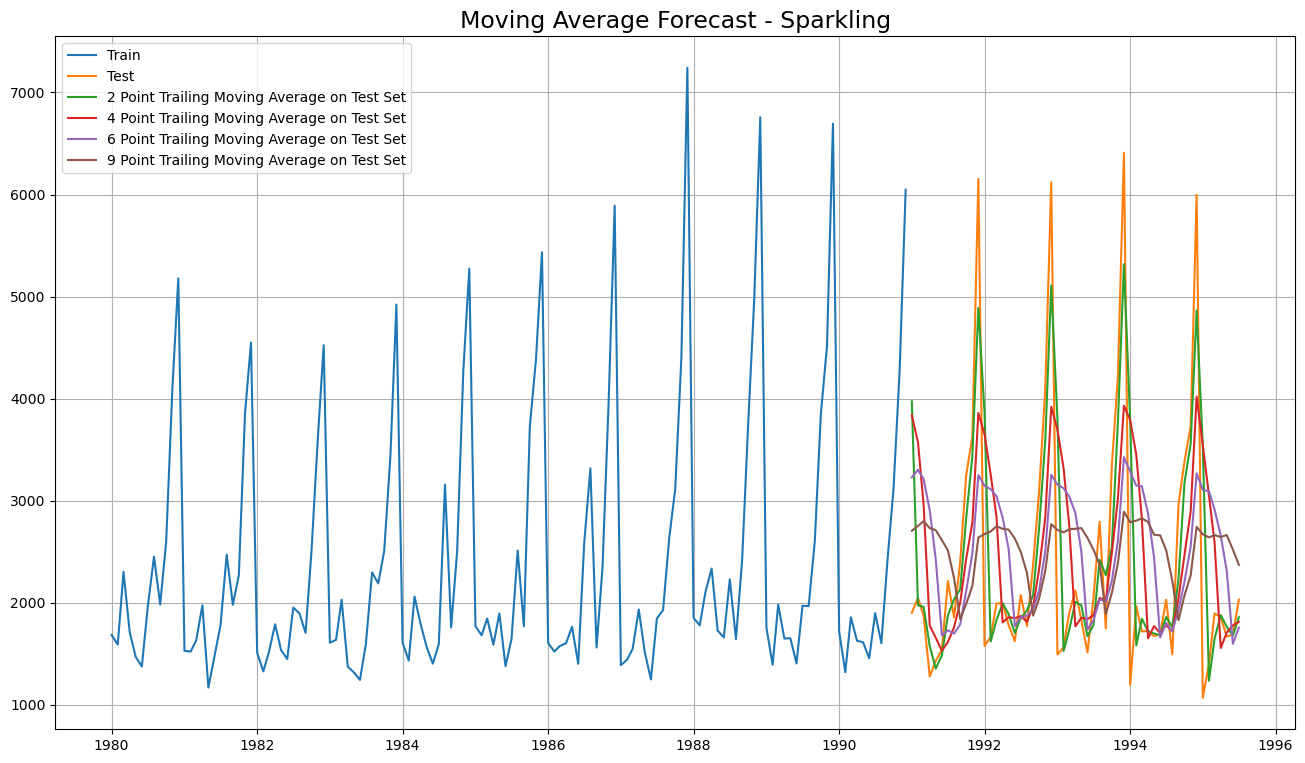

In [76]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');

## Model Evaluation

In [77]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [79]:
resultsDf5 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf5.to_csv('spark_ma.csv')
resultsDf5

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [80]:
resultsDf6 = pd.concat([resultsDf, resultsDf5], axis=0)
resultsDf6

Test RMSE Sparkling
RegressionOnTime                     1389.135175
NaiveModel                           3864.279352
SimpleAverageModel                   1275.081804
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [81]:
resultsDf = resultsDf6.copy()
resultsDf.to_csv('results_ma.csv')
resultsDf

Test RMSE Sparkling
RegressionOnTime                     1389.135175
NaiveModel                           3864.279352
SimpleAverageModel                   1275.081804
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

### Consolidated plots of All Models- Sparkling

In [82]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

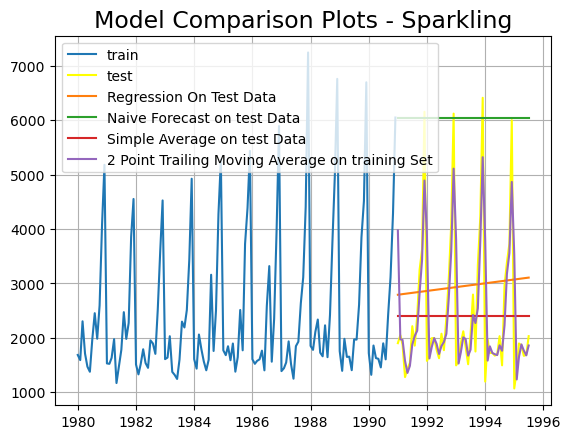

In [83]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

### Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

In [84]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

### SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors 

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [85]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [87]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07028781460389553,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897714,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
1991-11-01    2804.662714
1991-12-01    2804.662714
1992-01-01    2804.662714
1992-02-01    2804.662714
1992-03-01    2804.662714
1992-04-01    2804.662714
1992-05-01    2804.662714
1992-06-01    2804.662714
1992-07-01    2804.662714
1992-08-01    2804.662714
1992-09-01    2804.662714
1992-10-01    2804.662714
1992-11-01    2804.662714
1992-12-01    2804.662714
1993-01-01    2804.662714
1993-02-01    2804.662714
1993-03-01    2804.662714
1993-04-01    2804.662714
1993-05-01    2804.662714
1993-06-01    2804.662714
1993-07-01    2804.662714
1993-08-01    2804.662714
1993-09-01    2804.662714
1993-10-01    2804.662714
1993-11-01    2804.662714
1993-12-01    2804.662714
1994-01-01    2804.662714
1994-02-01    2804.662714
1994-03-01  

In [89]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [90]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [92]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))


SES RMSE: 1338.0046232563645


In [96]:
resultsDf6 = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf6

Test RMSE Sparkling
Simple Exponential Smoothing          1338.004623

In [97]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Sparkling
RegressionOnTime                      1389.135175
NaiveModel                            3864.279352
SimpleAverageModel                    1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Simple Exponential Smoothing          1338.004623

In [98]:
resultsDf = resultsDf7.copy()

### Holt - ETS(A, A, N) - Holt's linear method with additive errors - Sparkling Double Exponential Smoothing

In [99]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6638769379750992, 'smoothing_trend': 9.966252219085015e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681616946074, 'initial_trend': 29.018019327772173, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [100]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1991-01-01    5330.498600
1991-02-01    5359.514827
1991-03-01    5388.531055
1991-04-01    5417.547282
1991-05-01    5446.563509
1991-06-01    5475.579737
1991-07-01    5504.595964
1991-08-01    5533.612192
1991-09-01    5562.628419
1991-10-01    5591.644646
1991-11-01    5620.660874
1991-12-01    5649.677101
1992-01-01    5678.693328
1992-02-01    5707.709556
1992-03-01    5736.725783
1992-04-01    5765.742011
1992-05-01    5794.758238
1992-06-01    5823.774465
1992-07-01    5852.790693
1992-08-01    5881.806920
1992-09-01    5910.823147
1992-10-01    5939.839375
1992-11-01    5968.855602
1992-12-01    5997.871830
1993-01-01    6026.888057
1993-02-01    6055.904284
1993-03-01    6084.920512
1993-04-01    6113.936739
1993-05-01    6142.952966
1993-06-01    6171.969194
1993-07-01    6200.985421
1993-08-01    6230.001648
1993-09-01    6259.017876
1993-10-01    6288.034103
1993-11-01    6317.050331
1993-12-01    6346.066558
1994-01-01    6375.082785
1994-02-01    6404.099013
1994-03-01  

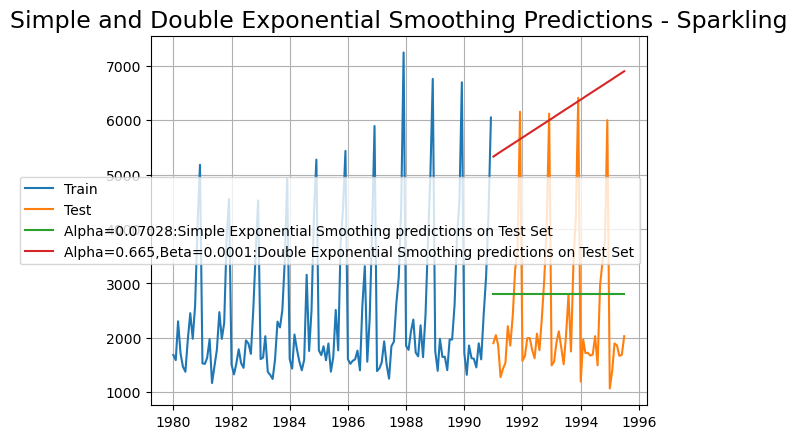

In [101]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');

In [102]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 3949.9312976553306


In [103]:
resultsDf8 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf8

Test RMSE Sparkling
Double Exponential Smoothing          3949.931298

In [104]:
resultsDf9 = pd.concat([resultsDf, resultsDf8], axis=0)
resultsDf9

Test RMSE Sparkling
RegressionOnTime                      1389.135175
NaiveModel                            3864.279352
SimpleAverageModel                    1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Simple Exponential Smoothing          1338.004623
Double Exponential Smoothing          3949.931298

In [105]:
resultsDf = resultsDf9.copy()
resultsDf

Test RMSE Sparkling
RegressionOnTime                      1389.135175
NaiveModel                            3864.279352
SimpleAverageModel                    1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Simple Exponential Smoothing          1338.004623
Double Exponential Smoothing          3949.931298

* Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors 

In [106]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1112722708441868, 'smoothing_trend': 0.012360804011805133, 'smoothing_seasonal': 0.4607176722812185, 'damping_trend': nan, 'initial_level': 2356.5780457745022, 'initial_trend': -0.10071063842436252, 'initial_seasons': array([-636.23320656, -722.98321108, -398.64408844, -473.43046147,
       -808.42474493, -815.34992566, -384.23070718,   72.99480164,
       -237.44227544,  272.32602348, 1541.37739846, 2590.07688887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [107]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

1991-01-01    1490.406418
1991-02-01    1204.529041
1991-03-01    1688.738437
1991-04-01    1551.230744
1991-05-01    1461.202870
1991-06-01    1278.652063
1991-07-01    1804.891340
1991-08-01    1678.961123
1991-09-01    2315.379595
1991-10-01    3224.983064
1991-11-01    4299.308651
1991-12-01    6410.721476
1992-01-01    1482.839506
1992-02-01    1196.962129
1992-03-01    1681.171525
1992-04-01    1543.663832
1992-05-01    1453.635958
1992-06-01    1271.085151
1992-07-01    1797.324428
1992-08-01    1671.394211
1992-09-01    2307.812683
1992-10-01    3217.416152
1992-11-01    4291.741739
1992-12-01    6403.154564
1993-01-01    1475.272594
1993-02-01    1189.395217
1993-03-01    1673.604613
1993-04-01    1536.096920
1993-05-01    1446.069046
1993-06-01    1263.518239
1993-07-01    1789.757516
1993-08-01    1663.827299
1993-09-01    2300.245771
1993-10-01    3209.849240
1993-11-01    4284.174827
1993-12-01    6395.587652
1994-01-01    1467.705682
1994-02-01    1181.828305
1994-03-01  

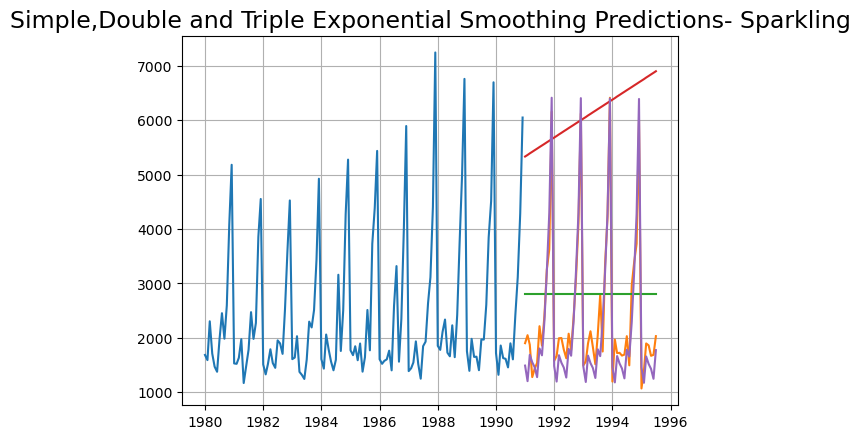

In [114]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [115]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 378.9443254087722


In [116]:
resultsDf10 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf10.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf10

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.944325

In [117]:
resultsDf11 = pd.concat([resultsDf, resultsDf10], axis=0)
resultsDf11

Test RMSE Sparkling
RegressionOnTime                                        1389.135175
NaiveModel                                              3864.279352
SimpleAverageModel                                      1275.081804
2pointTrailingMovingAverage                              813.400684
4pointTrailingMovingAverage                             1156.589694
6pointTrailingMovingAverage                             1283.927428
9pointTrailingMovingAverage                             1346.278315
Simple Exponential Smoothing                            1338.004623
Double Exponential Smoothing                            3949.931298
Triple Exponential Smoothing (Additive Season)           378.944325

In [118]:
resultsDf = resultsDf11.copy()

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [119]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11104076314043171, 'smoothing_trend': 0.049348365324315684, 'smoothing_seasonal': 0.36232794311434374, 'damping_trend': nan, 'initial_level': 2356.510722747615, 'initial_trend': -9.729116859640436, 'initial_seasons': array([0.71251887, 0.6830697 , 0.90596553, 0.8058403 , 0.65605007,
       0.65424925, 0.88796426, 1.13391231, 0.91920101, 1.21223812,
       1.87074711, 2.37464156]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1991-01-01    1587.864666
1991-02-01    1356.648339
1991-03-01    1763.307702
1991-04-01    1656.501849
1991-05-01    1542.339421
1991-06-01    1355.430169
1991-07-01    1854.667549
1991-08-01    1820.739312
1991-09-01    2277.549303
1991-10-01    3122.952179
1991-11-01    4129.813914
1991-12-01    5892.688044
1992-01-01    1538.913349
1992-02-01    1314.717328
1992-03-01    1708.667011
1992-04-01    1605.037920
1992-05-01    1494.297894
1992-06-01    1313.100706
1992-07-01    1796.596002
1992-08-01    1763.580952
1992-09-01    2205.862797
1992-10-01    3024.397877
1992-11-01    3999.141364
1992-12-01    5705.742990
1993-01-01    1489.962032
1993-02-01    1272.786317
1993-03-01    1654.026319
1993-04-01    1553.573992
1993-05-01    1446.256366
1993-06-01    1270.771242
1993-07-01    1738.524455
1993-08-01    1706.422592
1993-09-01    2134.176290
1993-10-01    2925.843575
1993-11-01    3868.468815
1993-12-01    5518.797936
1994-01-01    1441.010715
1994-02-01    1230.855306
1994-03-01  

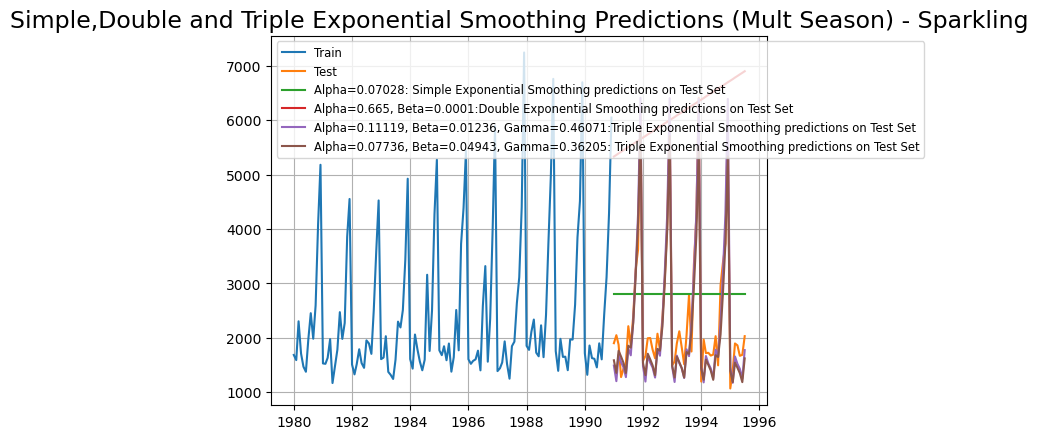

In [126]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='upper left', fontsize='small')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

## Report model accuracy

In [127]:
print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 403.125867235564


In [128]:
resultsDf12 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf12

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           403.125867

In [129]:
resultsDf13 = pd.concat([resultsDf, resultsDf12], axis=0)
resultsDf13

Test RMSE Sparkling
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
SimpleAverageModel                                          1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
Simple Exponential Smoothing                                1338.004623
Double Exponential Smoothing                                3949.931298
Triple Exponential Smoothing (Additive Season)               378.944325
Triple Exponential Smoothing (Multiplicative Se...           403.125867

In [131]:
resultsDf = resultsDf13.copy()
resultsDf

Test RMSE Sparkling
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
SimpleAverageModel                                          1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
Simple Exponential Smoothing                                1338.004623
Double Exponential Smoothing                                3949.931298
Triple Exponential Smoothing (Additive Season)               378.944325
Triple Exponential Smoothing (Multiplicative Se...           403.125867

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - USING DAMPED TREND

In [132]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11130170448043226, 'smoothing_trend': 0.00010018544635306122, 'smoothing_seasonal': 0.46068730417199644, 'damping_trend': 0.9900012175314848, 'initial_level': 2356.6761474352647, 'initial_trend': -0.04422027839395726, 'initial_seasons': array([-636.23261482, -722.98124799, -398.6266445 , -473.42670028,
       -808.42316311, -815.34798325, -384.22313886,   73.0096398 ,
       -237.44188444,  272.33235584, 1541.39956762, 2590.09577591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [133]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_spark =  model_TES.forecast(len(stest))
TES_predict_add_damp_spark

1991-01-01    1484.903545
1991-02-01    1200.729064
1991-03-01    1686.333451
1991-04-01    1550.172051
1991-05-01    1461.209225
1991-06-01    1279.625334
1991-07-01    1806.777508
1991-08-01    1681.610249
1991-09-01    2318.155723
1991-10-01    3228.082062
1991-11-01    4302.787958
1991-12-01    6410.854270
1992-01-01    1484.713826
1992-02-01    1200.541242
1992-03-01    1686.147507
1992-04-01    1549.987966
1992-05-01    1461.026981
1992-06-01    1279.444912
1992-07-01    1806.598890
1992-08-01    1681.433417
1992-09-01    2317.980659
1992-10-01    3227.908748
1992-11-01    4302.616378
1992-12-01    6410.684405
1993-01-01    1484.545659
1993-02-01    1200.374756
1993-03-01    1685.982686
1993-04-01    1549.824793
1993-05-01    1460.865440
1993-06-01    1279.284986
1993-07-01    1806.440563
1993-08-01    1681.276673
1993-09-01    2317.825482
1993-10-01    3227.755123
1993-11-01    4302.464289
1993-12-01    6410.533837
1994-01-01    1484.396597
1994-02-01    1200.227184
1994-03-01  

In [134]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17);
plt.savefig('spark_add_damp_tes.jpg', bbox_inches='tight');

In [135]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(stest.values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 373.64402518561496


In [137]:
resultsDf14 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf14.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf14

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...           378.944325

In [138]:
resultsDf15 = pd.concat([resultsDf, resultsDf14], axis=0)
resultsDf15

Test RMSE Sparkling
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
SimpleAverageModel                                          1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
Simple Exponential Smoothing                                1338.004623
Double Exponential Smoothing                                3949.931298
Triple Exponential Smoothing (Additive Season)               378.944325
Triple Exponential Smoothing (Multiplicative Se...           403.125867
Triple Exponential Smoothing (Additive Season, ...           378.944325

In [139]:
resultsDf = resultsDf15.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY USING DAMPED TREND

In [140]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11106052423421174, 'smoothing_trend': 0.03701647223985424, 'smoothing_seasonal': 0.39513378502815255, 'damping_trend': 0.9900004449237181, 'initial_level': 2356.510577464402, 'initial_trend': -10.036314551233342, 'initial_seasons': array([0.71375176, 0.68455638, 0.90053564, 0.80547398, 0.65380817,
       0.6546513 , 0.8817329 , 1.12341156, 0.91579514, 1.19236091,
       1.85224145, 2.3434743 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [141]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.417743
1991-02-01    1348.064192
1991-03-01    1768.332413
1991-04-01    1654.030346
1991-05-01    1548.102859
1991-06-01    1363.558666
1991-07-01    1862.850750
1991-08-01    1797.282855
1991-09-01    2310.532266
1991-10-01    3163.659822
1991-11-01    4176.932920
1991-12-01    5994.258866
1992-01-01    1558.906046
1992-02-01    1320.750336
1992-03-01    1732.798181
1992-04-01    1621.067045
1992-05-01    1517.505434
1992-06-01    1336.831653
1992-07-01    1826.639797
1992-08-01    1762.636514
1992-09-01    2266.362422
1992-10-01    3103.684809
1992-11-01    4098.409589
1992-12-01    5882.513044
1993-01-01    1530.088015
1993-02-01    1296.539617
1993-03-01    1701.301005
1993-04-01    1591.848717
1993-05-01    1490.384193
1993-06-01    1313.141104
1993-07-01    1794.542784
1993-08-01    1731.926355
1993-09-01    2227.210729
1993-10-01    3050.523578
1993-11-01    4028.807320
1993-12-01    5783.462703
1994-01-01    1504.544010
1994-02-01    1275.079485
1994-03-01  

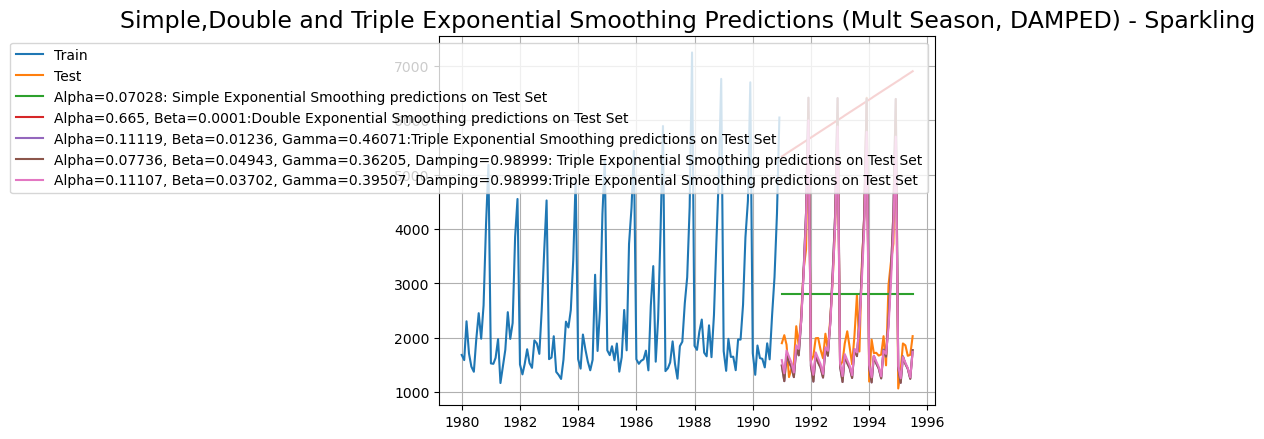

In [142]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [143]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.4646741278019


In [144]:
resultsDf16 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf16

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           352.464674

In [145]:
resultsDf17 = pd.concat([resultsDf, resultsDf16], axis=0)
resultsDf17

Test RMSE Sparkling
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
SimpleAverageModel                                          1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
Simple Exponential Smoothing                                1338.004623
Double Exponential Smoothing                                3949.931298
Triple Exponential Smoothing (Additive Season)               378.944325
Triple Exponential Smoothing (Multiplicative Se...           403.125867
Triple Exponential Smoothing (Additive Season, ...           378.944325
Triple Exponential Smoothing (Multiplicative Se...           352.464674

In [146]:
resultsDf = resultsDf17.copy()
resultsDf

Test RMSE Sparkling
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
SimpleAverageModel                                          1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
Simple Exponential Smoothing                                1338.004623
Double Exponential Smoothing                                3949.931298
Triple Exponential Smoothing (Additive Season)               378.944325
Triple Exponential Smoothing (Multiplicative Se...           403.125867
Triple Exponential Smoothing (Additive Season, ...           378.944325
Triple Exponential Smoothing (Multiplicative Se...           352.464674

In [147]:
resultsDf.to_csv('results_all.csv')

### Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY USING DAMPED TREND

In [148]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11106052423421174, 'smoothing_trend': 0.03701647223985424, 'smoothing_seasonal': 0.39513378502815255, 'damping_trend': 0.9900004449237181, 'initial_level': 2356.510577464402, 'initial_trend': -10.036314551233342, 'initial_seasons': array([0.71375176, 0.68455638, 0.90053564, 0.80547398, 0.65380817,
       0.6546513 , 0.8817329 , 1.12341156, 0.91579514, 1.19236091,
       1.85224145, 2.3434743 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [149]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.417743
1991-02-01    1348.064192
1991-03-01    1768.332413
1991-04-01    1654.030346
1991-05-01    1548.102859
1991-06-01    1363.558666
1991-07-01    1862.850750
1991-08-01    1797.282855
1991-09-01    2310.532266
1991-10-01    3163.659822
1991-11-01    4176.932920
1991-12-01    5994.258866
1992-01-01    1558.906046
1992-02-01    1320.750336
1992-03-01    1732.798181
1992-04-01    1621.067045
1992-05-01    1517.505434
1992-06-01    1336.831653
1992-07-01    1826.639797
1992-08-01    1762.636514
1992-09-01    2266.362422
1992-10-01    3103.684809
1992-11-01    4098.409589
1992-12-01    5882.513044
1993-01-01    1530.088015
1993-02-01    1296.539617
1993-03-01    1701.301005
1993-04-01    1591.848717
1993-05-01    1490.384193
1993-06-01    1313.141104
1993-07-01    1794.542784
1993-08-01    1731.926355
1993-09-01    2227.210729
1993-10-01    3050.523578
1993-11-01    4028.807320
1993-12-01    5783.462703
1994-01-01    1504.544010
1994-02-01    1275.079485
1994-03-01  

In [150]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Best Model for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_best_model.jpg', bbox_inches='tight');

## Check Stationarity of SPARKLING Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the alpha value.

In [152]:
from statsmodels.tsa.stattools import adfuller


dfss = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932069
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [153]:
dfss = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


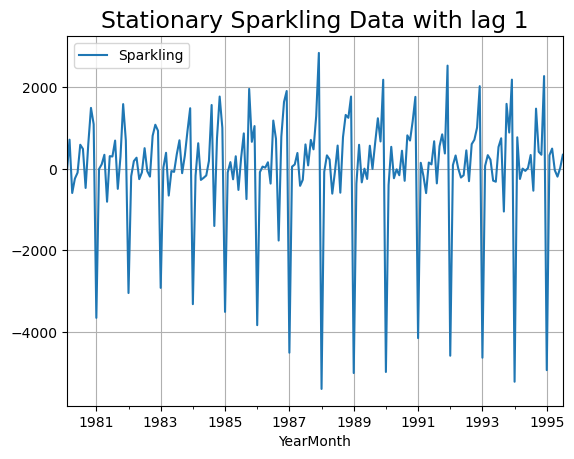

In [154]:
dfs.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');

## ARIMA / SARIMA Modelling on SPARKLING dataset Check for stationarity of the Training Data - Sparkling

Let us plot the training data once.

In [155]:
strain.plot(grid=True);

In [156]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593693
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [157]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515968e-11
Number of lags used 11


training data is now Stationary Now, let us go ahead and plot the differenced training data.

In [158]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [159]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Note: The data has some seasonality so ideally we should build a SARIMA model. But we'll check least AIC of ARIMA and then SARIMA

In [160]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [161]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [162]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918632
ARIMA(0, 1, 2) - AIC:2234.4083231261075
ARIMA(0, 1, 3) - AIC:2233.9948577413234
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946699257


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: Futu

ARIMA(1, 1, 2) - AIC:2234.527200452215
ARIMA(1, 1, 3) - AIC:2235.607809755081
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262083544


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: Futu

ARIMA(2, 1, 2) - AIC:2213.5092126923055
ARIMA(2, 1, 3) - AIC:2232.855899257009
ARIMA(3, 1, 0) - AIC:2257.72337899794


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed f

ARIMA(3, 1, 1) - AIC:2235.49902102709
ARIMA(3, 1, 2) - AIC:2230.7606253111467


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. U

ARIMA(3, 1, 3) - AIC:2221.458792062972


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/4089217356.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [163]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.458792
14  (3, 1, 2)  2230.760625
11  (2, 1, 3)  2232.855899
9   (2, 1, 1)  2233.777626

In [164]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Tue, 31 Oct 2023   AIC                           2213.509
Time:                        15:40:45   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.780      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Diagnostics plot

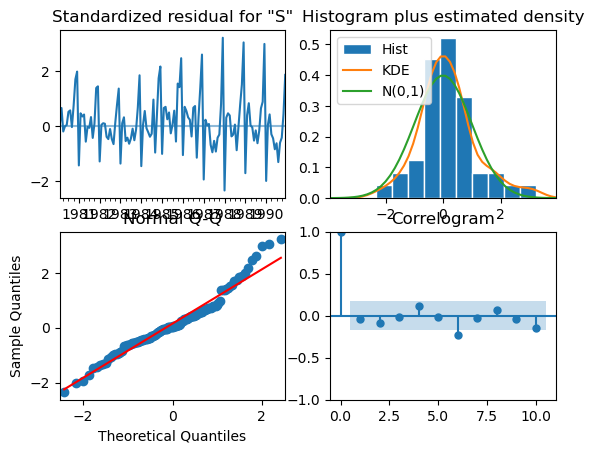

In [165]:
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [166]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [167]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [168]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9802499817208 
MAPE: 47.09987977755451


In [169]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')
resultsDf

RMSE      MAPE
ARIMA(2,1,2)  1299.98025  47.09988

In [170]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots

Let us look at the ACF and the PACF plots once more.

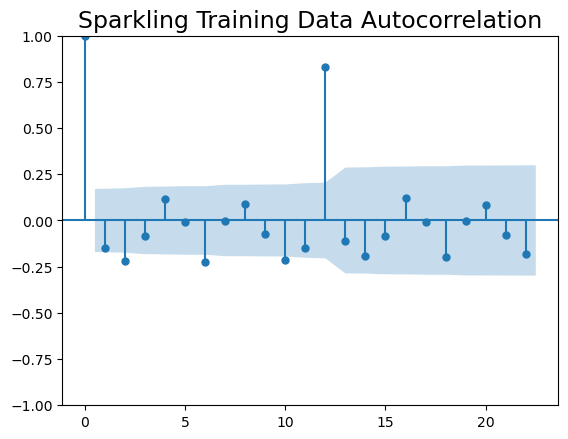

In [171]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');

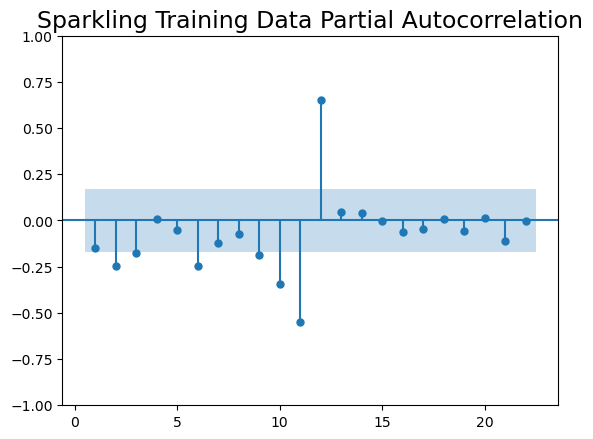

In [172]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');

By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [173]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Tue, 31 Oct 2023   AIC                           2267.663
Time:                        15:45:01   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Let us analyse the residuals from the various diagnostics plot.

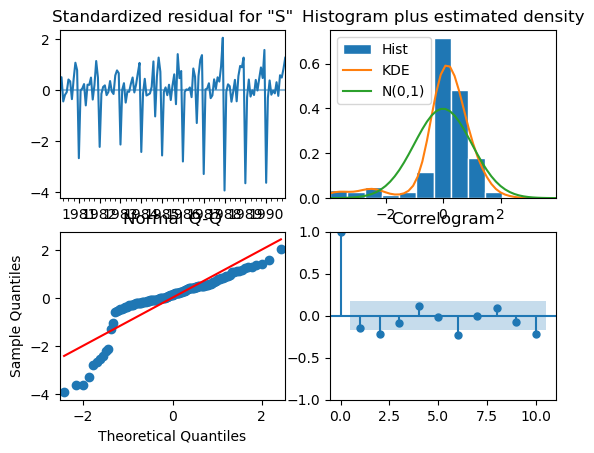

In [174]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

Predict on the Test Set using this model and evaluate the model.

In [175]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [ ]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

In [176]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)  1299.98025  47.09988
ARIMA(0,1,0)  1299.98025  47.09988

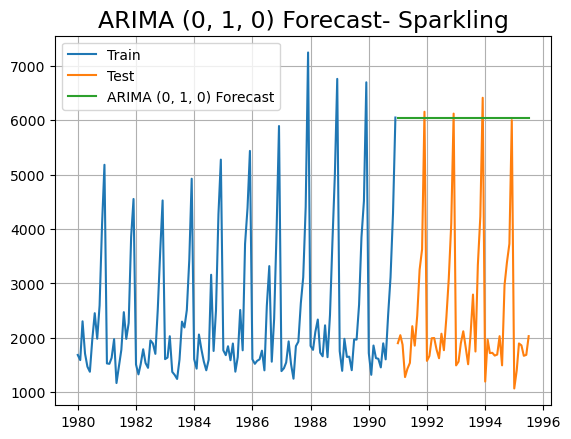

In [177]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

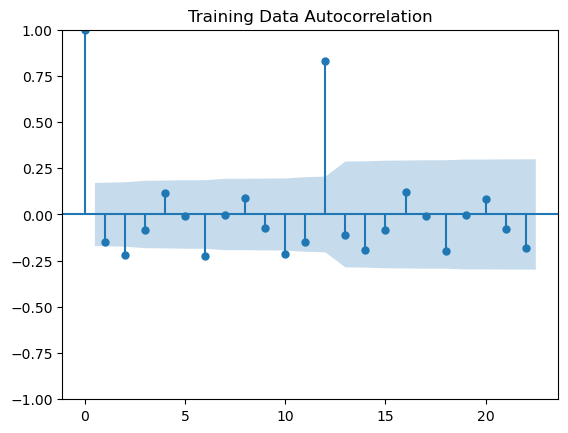

In [178]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [179]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [180]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [181]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52034D+00    |proj g|=  1.10083D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.712D-06   8.520D+00
  F =   8.5203019685086989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.261E+01  -gs= 6.910E-01 BFGS update SKIPPED
  ys=-8.757E+01  -gs= 7.064E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     83      2     2     0   7.945D+03   1.602D+01
  F =   16.024490242468843     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4238.465424011774
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94484D+00    |proj g|=  2.86769D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.349E+03  -gs= 7.119E-01 BFGS update SKIPPED
  ys=-1.181E+03  -gs= 7.117E-01 BFGS update SKIPPED


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     39      3     2     0   1.394D+04   1.534D+01
  F =   15.335012037660110     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4058.4431779422694
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22113D+00    |proj g|=  2.77509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.14370D+00    |proj g|=  1.89178D-04

At iterate   15    f=  6.14370D+00    |proj g|=  2.05381D-03

At iterate   20    f=  6.14349D+00    |proj g|=  3.47806D-02

At iterate   25    f=  6.14069D+00    |proj g|=  4.56020D-02

At iterate   30    f=  6.14011D+00    |proj g|=  1.50561D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   1.160D-06   6.140D+00
  F =   6.1401128992124230     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920797
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.290E+01  -gs= 6.913E-01 BFGS update SKIPPED
  ys=-2.206E+01  -gs= 6.890E-01 BFGS update SKIPPED

At iterate    5    f=  1.30846D+01    |proj g|=  5.10465D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     66      2     2     0   5.105D+04   1.308D+01
  F =   13.084594601673176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3466.3329748417186
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52825D+00


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     14      1     0     0   2.540D-05   5.528D+00
  F =   5.5282477633743969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52793D+00    |proj g|=  9.63531D-03

At iterate    5    f=  5.52773D+00    |proj g|=  2.97532D-02

At iterate   10    f=  5.52723D+00    |proj g|=  1.41468D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.52983D+00    |proj g|=  3.23208D-02

At iterate   10    f=  5.52682D+00    |proj g|=  2.67914D-03

At iterate   15    f=  5.52674D+00    |proj g|=  1.30496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     22      1     0     0   8.945D-05   5.527D+00
  F =   5.5267403522970850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064304
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.245E+01  -gs= 6.909E-01 BFGS update SKIPPED
  ys=-1.406E+02  -gs= 7.086E-01 BFGS update SKIPPED

At iterate    5    f=  1.10023D+01    |proj g|=  2.85529D+05
  ys=-1.058E-01  -gs= 1.857E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6    102      3     3     0   2.855D+05   1.100D+01
  F =   11.002321977618266     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2918.613002091222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43494D+00    |proj g|=  4.51382D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.59831D+00    |proj g|=  7.89090D-03

At iterate   20    f=  6.59746D+00    |proj g|=  2.57423D-02

At iterate   25    f=  6.49454D+00    |proj g|=  3.05593D-01

At iterate   30    f=  6.41950D+00    |proj g|=  4.01656D-02

At iterate   35    f=  6.38439D+00    |proj g|=  3.01344D-02

At iterate   40    f=  6.38147D+00    |proj g|=  4.39440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     70      1     1     0   1.009D-05   6.381D+00
  F =   6.3814733230107707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572748

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.011E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-2.274E+02  -gs= 7.024E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5    116      3     2     0   1.676D+05   1.253D+01
  F =   12.531770083755051     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3318.3873021113336
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39606D+00    |proj g|=  1.95100D-02

At iterate    5    f=  7.39343D+00    |proj g|=  5.78513D-04

At iterate   10    f=  7.39306D+00    |proj g|=  1.36713D-02

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.51210D+00    |proj g|=  1.67353D-03

At iterate   15    f=  6.51207D+00    |proj g|=  6.77500D-04

At iterate   20    f=  6.51091D+00    |proj g|=  2.73466D-02

At iterate   25    f=  6.46410D+00    |proj g|=  1.46076D-01

At iterate   30    f=  5.94736D+00    |proj g|=  1.79600D-01

At iterate   35    f=  5.90965D+00    |proj g|=  1.40890D-02

At iterate   40    f=  5.90959D+00    |proj g|=  1.51567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     58      1     0     0   2.101D-05   5.910D+00
  F =   5.9095907780136727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72883D+01    |proj g|=  5.17647D-04
  ys=-3.011E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-2.273E+02  -gs= 7.024E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5    116      3     2     0   1.838D+05   1.220D+01
  F =   12.204610600416588     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3234.017198509979
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64553D+00    |proj g|=  2.79384D-02

At iterate    5    f=  6.63558D+00    |proj g|=  7.64597D-03

At iterate   10    f=  6.63551D+00    |proj g|=  1.48500D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.29259D+00    |proj g|=  8.82615D-02

At iterate   30    f=  6.04440D+00    |proj g|=  1.70582D-01

At iterate   35    f=  6.01980D+00    |proj g|=  2.31878D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     58      1     0     0   2.240D-05   6.020D+00
  F =   6.0197898047306291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084488861
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.51434D+00    |proj g|=  2.13880D-02

At iterate   10    f=  6.50894D+00    |proj g|=  1.34084D-03

At iterate   15    f=  6.50888D+00    |proj g|=  6.84898D-04

At iterate   20    f=  6.50860D+00    |proj g|=  6.51048D-03

At iterate   25    f=  6.49600D+00    |proj g|=  3.31183D-02

At iterate   30    f=  6.43000D+00    |proj g|=  2.77037D-01

At iterate   35    f=  5.94946D+00    |proj g|=  4.43660D-01

At iterate   40    f=  5.90395D+00    |proj g|=  5.21706D-02

At iterate   45    f=  5.90291D+00    |proj g|=  9.27374D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     65   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.011E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-4.944E+01  -gs= 6.948E-01 BFGS update SKIPPED

At iterate    5    f=  1.16475D+01    |proj g|=  2.11878D+05
  ys=-6.150E+00  -gs= 6.042E-01 BFGS update SKIPPED
  ys=-1.942E-02  -gs= 1.836E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7    110      2     4     0   2.343D+05   1.136D+01
  F =   11.362787831603580     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3013.775987543345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90038D+00    |proj g|=  2.69575D-02

At iterate    5    f=  5.89108D+00    |proj g|=  3.05866D-03

At iterate   10    f=  5.89097D+00    |proj g|=  4.76817D-04

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.89090D+00    |proj g|=  4.03698D-03

At iterate   10    f=  5.89082D+00    |proj g|=  4.77144D-04

At iterate   15    f=  5.89021D+00    |proj g|=  3.68457D-03

At iterate   20    f=  5.85888D+00    |proj g|=  6.53630D-02

At iterate   25    f=  5.52267D+00    |proj g|=  2.40763D+00

At iterate   30    f=  5.38474D+00    |proj g|=  2.95096D-01

At iterate   35    f=  5.37362D+00    |proj g|=  2.05624D-01

At iterate   40    f=  5.36798D+00    |proj g|=  3.44060D-02

At iterate   45    f=  5.36710D+00    |proj g|=  1.86782D-02

At iterate   50    f=  5.36696D+00    |proj g|=  8.43864D-03

At iterate   55    f=  5.36694D+00    |proj g|=  2.08428D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     56     89      1     0     0   2.084D-05   5.367D+00
  F =   5.3669424180115177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727983550407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91570D+00    |proj g|=  1.02256D-01

At iterate    5    f=  5.89995D+00    |proj g|=  3.71337D-02

At iterate   10    f=  5.89064D+00    |proj g|=  5.88275D-04

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.011E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-2.292E+02  -gs= 7.024E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  1.30862D+01    |proj g|=  2.70672D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     96      2     2     0   2.707D+04   1.309D+01
  F =   13.086219046085077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3470.7618281664604
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32942D+00    |proj g|=  1.05574D-01

At iterate    5    f=  8.26303D+00    |proj g|=  1.68046D-04

           * *

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.51089D+00    |proj g|=  1.95195D-03

At iterate   20    f=  6.50753D+00    |proj g|=  2.77542D-02

At iterate   25    f=  6.30026D+00    |proj g|=  2.15814D-01

At iterate   30    f=  6.25530D+00    |proj g|=  1.27157D-01

At iterate   35    f=  6.24957D+00    |proj g|=  4.90534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     48      1     0     0   1.961D-05   6.250D+00
  F =   6.2495416252054525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890542396
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.341E+01  -gs= 6.774E-01 BFGS update SKIPPED
  ys=-1.125E+02  -gs= 6.927E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     86      2     2     0   2.422D+04   1.473D+01
  F =   14.728625575399358     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3900.3571519054303
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38220D+00    |proj g|=  2.99241D-02

At iterate    5    f=  7.37844D+00    |proj g|=  5.91790D-04

At iterate   10    f=  7.37826D+00    |proj g|=  5.77770D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



At iterate   30    f=  6.54310D+00    |proj g|=  1.75322D-01

At iterate   35    f=  6.49343D+00    |proj g|=  3.81766D-02

At iterate   40    f=  6.49306D+00    |proj g|=  1.08172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     48      1     0     0   1.082D-04   6.493D+00
  F =   6.4930587413601026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.167507719067
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f=  6.44035D+00    |proj g|=  2.87316D-03

At iterate   20    f=  6.43760D+00    |proj g|=  3.37024D-02

At iterate   25    f=  6.27970D+00    |proj g|=  1.52533D-01

At iterate   30    f=  5.94123D+00    |proj g|=  1.39211D+00

At iterate   35    f=  5.85693D+00    |proj g|=  1.09944D-01

At iterate   40    f=  5.85288D+00    |proj g|=  1.38310D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   5.461D-05   5.853D+00
  F =   5.8528807076585299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068218

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69856D+01    |proj g|=  5.18918D-04
  ys=-2.342E+01  -gs= 6.774E-01 BFGS update SKIPPED
  ys=-1.176E+02  -gs= 6.928E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     86      2     2     0   2.531D+04   1.452D+01
  F =   14.517057117069687     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3846.503078906397
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63133D+00    |proj g|=  2.97755D-02

At iterate    5    f=  6.62522D+00    |proj g|=  8.04445D-03

At iterate   10    f=  6.62481D+00    |proj g|=  7.74497D-04

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.54721D+00    |proj g|=  1.50298D-01

At iterate   30    f=  6.10315D+00    |proj g|=  4.90138D-01

At iterate   35    f=  6.01772D+00    |proj g|=  8.22375D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     53      1     0     0   3.224D-05   6.017D+00
  F =   6.0172116665549069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438799704955
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.43750D+00    |proj g|=  1.65009D-03

At iterate   25    f=  6.43627D+00    |proj g|=  8.98855D-03

At iterate   30    f=  6.35098D+00    |proj g|=  2.45827D-01

At iterate   35    f=  6.02088D+00    |proj g|=  3.32549D-01

At iterate   40    f=  5.88591D+00    |proj g|=  3.50243D-01

At iterate   45    f=  5.85327D+00    |proj g|=  2.57480D-02

At iterate   50    f=  5.84904D+00    |proj g|=  1.49347D-01

At iterate   55    f=  5.84582D+00    |proj g|=  5.88540D-02

At iterate   60    f=  5.84517D+00    |proj g|=  5.04967D-03

At iterate   65    f=  5.84516D+00    |proj g|=  7.89825D-04

At iterate   70    f=  5.84516D+00    |proj g|=  1.01125D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66272D+01    |proj g|=  5.19191D-04
  ys=-2.385E+01  -gs= 6.777E-01 BFGS update SKIPPED

At iterate    5    f=  1.15290D+01    |proj g|=  2.01642D+05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     68      1     1     0   2.016D+05   1.153D+01
  F =   11.528962589877214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3059.6461237275844
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88816D+00    |proj g|=  2.67229D-02

At iterate    5    f=  5.88223D+00    |proj g|=  3.03619D-03

At iterate   10    f=  5.88201D+00    |proj g|=  2.94554D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.88222D+00    |proj g|=  7.06731D-03

At iterate   10    f=  5.88200D+00    |proj g|=  1.35942D-03

At iterate   15    f=  5.88195D+00    |proj g|=  2.16959D-03

At iterate   20    f=  5.88182D+00    |proj g|=  3.00753D-03

At iterate   25    f=  5.86023D+00    |proj g|=  4.13228D-02

At iterate   30    f=  5.52946D+00    |proj g|=  4.79377D-01

At iterate   35    f=  5.39670D+00    |proj g|=  4.02464D-02

At iterate   40    f=  5.36538D+00    |proj g|=  1.00498D-01

At iterate   45    f=  5.36302D+00    |proj g|=  1.42143D-02

At iterate   50    f=  5.36267D+00    |proj g|=  6.76955D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.88732D+00    |proj g|=  3.22763D-02

At iterate   10    f=  5.88191D+00    |proj g|=  3.87412D-03

At iterate   15    f=  5.88183D+00    |proj g|=  1.09017D-03

At iterate   20    f=  5.88178D+00    |proj g|=  1.42741D-03

At iterate   25    f=  5.87904D+00    |proj g|=  1.10218D-02

At iterate   30    f=  5.82074D+00    |proj g|=  7.66214D-02

At iterate   35    f=  5.59106D+00    |proj g|=  3.70589D-01

At iterate   40    f=  5.38177D+00    |proj g|=  1.23963D-01

At iterate   45    f=  5.37079D+00    |proj g|=  7.97589D-02

At iterate   50    f=  5.35886D+00    |proj g|=  3.05575D-02

At iterate   55    f=  5.35867D+00    |proj g|=  2.31279D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.327E+01  -gs= 6.773E-01 BFGS update SKIPPED
  ys=-3.216E+01  -gs= 6.825E-01 BFGS update SKIPPED

At iterate    5    f=  1.19136D+01    |proj g|=  1.59430D+05
  ys=-1.439E+01  -gs= 6.687E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6    104      2     3     0   1.594D+05   1.191D+01
  F =   11.913587723026485     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3163.187158878992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21117D+00    |proj g|=  1.86120D-01

At iterate    5    f=  8.18715D+00    |proj g|=  3.42436D-04

At iterate   10    f=  8.18714D+00    |proj g|=  3.35748D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50037D+00    |proj g|=  2.75287D-01

At iterate    5    f=  6.42432D+00    |proj g|=  4.60879D-02

At iterate   10    f=  6.41985D+00    |proj g|=  5.14646D-03

At iterate   15    f=  6.41970D+00    |proj g|=  1.38619D-03


 This problem is unconstrained.



At iterate   20    f=  6.41954D+00    |proj g|=  1.25021D-02

At iterate   25    f=  6.33279D+00    |proj g|=  2.23237D-01

At iterate   30    f=  6.27045D+00    |proj g|=  1.33221D-01

At iterate   35    f=  6.18129D+00    |proj g|=  7.47503D-02

At iterate   40    f=  6.17916D+00    |proj g|=  6.54333D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     56      1     0     0   1.827D-05   6.179D+00
  F =   6.1791566900422046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.297366171142
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.083E+01  -gs= 6.680E-01 BFGS update SKIPPED
  ys=-2.542E+01  -gs= 6.716E-01 BFGS update SKIPPED

At iterate    5    f=  1.32964D+01    |proj g|=  3.36853D+04
  ys=-9.773E-01  -gs= 6.752E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     99      2     3     0   3.369D+04   1.330D+01
  F =   13.296362288292332     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3524.239644109176
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34019D+00    |proj g|=  1.96882D-02

At iterate    5    f=  7.33716D+00    |proj g|=  6.15452D-04

At iterate   10    f=  7.33682D+00    |proj g|=  5.18512D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.07608D+00    |proj g|=  1.34170D-03

At iterate   20    f=  7.07545D+00    |proj g|=  1.62997D-02

At iterate   25    f=  7.05405D+00    |proj g|=  9.97916D-02

At iterate   30    f=  6.79522D+00    |proj g|=  2.10650D-01

At iterate   35    f=  6.47045D+00    |proj g|=  8.72271D-02

At iterate   40    f=  6.43444D+00    |proj g|=  9.81407D-02

At iterate   45    f=  6.43424D+00    |proj g|=  1.28438D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     63      1     0     0   3.355D-05   6.434D+00
  F =   6.4342439689662712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.34125D+00    |proj g|=  2.94637D-03

At iterate   20    f=  6.33798D+00    |proj g|=  3.31674D-02

At iterate   25    f=  6.23855D+00    |proj g|=  1.94980D-01

At iterate   30    f=  5.80451D+00    |proj g|=  9.92028D-02

At iterate   35    f=  5.79088D+00    |proj g|=  2.44651D-02

At iterate   40    f=  5.79069D+00    |proj g|=  1.76250D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     52      1     0     0   4.579D-05   5.791D+00
  F =   5.7906890064477787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418977022

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.083E+01  -gs= 6.680E-01 BFGS update SKIPPED
  ys=-2.543E+01  -gs= 6.717E-01 BFGS update SKIPPED
  ys=-2.348E+01  -gs= 6.703E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.37496D+01    |proj g|=  4.98268D+04
  ys=-1.851E+00  -gs= 4.849E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7    133      3     4     0   2.400D+05   1.137D+01
  F =   11.368911299490168     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3017.3925830654043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59495D+00    |proj g|=  3.12074D-02

At iterate    5    f=  6.58643D+00    |proj g|=  5.67590D-04

At iterate   10    f=  6.58637D+00    |proj g|=  3.03105D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.58519D+00    |proj g|=  5.70072D-04

At iterate   15    f=  6.58491D+00    |proj g|=  4.48807D-03

At iterate   20    f=  6.57961D+00    |proj g|=  1.67809D-02

At iterate   25    f=  6.54593D+00    |proj g|=  8.00837D-02

At iterate   30    f=  6.23678D+00    |proj g|=  1.32510D+00

At iterate   35    f=  6.05340D+00    |proj g|=  2.18676D-01

At iterate   40    f=  6.01505D+00    |proj g|=  7.06131D-02

At iterate   45    f=  6.01176D+00    |proj g|=  7.07487D-03

At iterate   50    f=  6.01162D+00    |proj g|=  6.15756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     53     71   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate    5    f=  6.34126D+00    |proj g|=  1.59975D-02

At iterate   10    f=  6.33878D+00    |proj g|=  6.80181D-04

At iterate   15    f=  6.33874D+00    |proj g|=  5.48712D-04

At iterate   20    f=  6.33845D+00    |proj g|=  4.97728D-03

At iterate   25    f=  6.32944D+00    |proj g|=  3.30371D-02

At iterate   30    f=  6.28542D+00    |proj g|=  1.03371D-01

At iterate   35    f=  5.99639D+00    |proj g|=  4.13885D-01

At iterate   40    f=  5.80272D+00    |proj g|=  1.51153D-01

At iterate   45    f=  5.79521D+00    |proj g|=  7.02477D-02

At iterate   50    f=  5.78761D+00    |proj g|=  2.02089D-02

At iterate   55    f=  5.78590D+00    |proj g|=  2.00938D-02

At iterate   60    f=  5.78450D+00    |proj g|=  9.75806D-03

At iterate   65    f=  5.78428D+00    |proj g|=  1.23054D-03

At iterate   70    f=  5.78428D+00    |proj g|=  2.95496D-03

At iterate   75    f=  5.78428D+00    |proj g|=  6.88249D-05

           * * *

Tit   = total number of iterations
Tnf   = total num

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.846E+01  -gs= 6.656E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     71      2     1     0   2.904D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:18.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85687D+00    |proj g|=  3.27240D-02


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.84847D+00    |proj g|=  1.13183D-02

At iterate   10    f=  5.84819D+00    |proj g|=  8.88324D-04

At iterate   15    f=  5.84816D+00    |proj g|=  1.84898D-03

At iterate   20    f=  5.84780D+00    |proj g|=  1.21414D-02

At iterate   25    f=  5.83472D+00    |proj g|=  4.43855D-02

At iterate   30    f=  5.54722D+00    |proj g|=  4.52478D-01

At iterate   35    f=  5.36674D+00    |proj g|=  8.61694D-02

At iterate   40    f=  5.36232D+00    |proj g|=  1.01102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     66      1     0     0   1.073D-04   5.362D+00
  F =   5.36232176055

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85689D+00    |proj g|=  3.33618D-02

At iterate    5    f=  5.84821D+00    |proj g|=  3.56044D-03

At iterate   10    f=  5.84801D+00    |proj g|=  6.68658D-04

At iterate   15    f=  5.84775D+00    |proj g|=  5.93149D-03

At iterate   20    f=  5.81606D+00    |proj g|=  8.66169D-02

At iterate   25    f=  5.64214D+00    |proj g|=  1.61241D-01

At iterate   30    f=  5.42091D+00    |proj g|=  2.73382D-01

At iterate   35    f=  5.39848D+00    |proj g|=  2.00639D-02

At iterate   40    f=  5.39827D+00    |proj g|=  3.56944D-04

At iterate   45    f=  5.39827D+00    |proj g|=  7.94964D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.85434D+00    |proj g|=  3.34038D-02

At iterate   10    f=  5.84785D+00    |proj g|=  1.88618D-03

At iterate   15    f=  5.84780D+00    |proj g|=  6.38585D-04

At iterate   20    f=  5.84776D+00    |proj g|=  1.17026D-03

At iterate   25    f=  5.84744D+00    |proj g|=  3.72600D-03

At iterate   30    f=  5.84535D+00    |proj g|=  7.73293D-03

At iterate   35    f=  5.77882D+00    |proj g|=  2.03679D-01

At iterate   40    f=  5.65173D+00    |proj g|=  4.30990D-01

At iterate   45    f=  5.43263D+00    |proj g|=  4.30933D-01

At iterate   50    f=  5.35501D+00    |proj g|=  7.45828D-02

At iterate   55    f=  5.35250D+00    |proj g|=  2.07848D-02

At iterate   60    f=  5.35243D+00    |proj g|=  5.11469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.097E+01  -gs= 6.681E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.967E+02  -gs= 6.870E-01 BFGS update SKIPPED
  ys=-2.687E+01  -gs= 6.725E-01 BFGS update SKIPPED


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be remov


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     84      4     3     0   1.786D+04   1.445D+01
  F =   14.446269264575431     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3833.815085847914
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50878D+00    |proj g|=  4.97788D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  6.48966D+00    |proj g|=  1.04443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   2.519D-06   6.490D+00
  F =   6.4896547258921187     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77640D+01    |proj g|=  5.20747D-04


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.108E-01 BFGS update SKIPPED
  ys=-1.051E+01  -gs= 6.925E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     81      3     2     0   1.041D+05   1.323D+01
  F =   13.233908821794987     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3503.751928953877
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34029D+00    |proj g|=  2.47178D-02

At iterate    5    f=  7.33802D+00    |proj g|=  1.80520D-03

At iterate   10    f=  7.33319D+00    |proj g|=  3.50590D-02

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate   10    f=  6.58747D+00    |proj g|=  5.13888D-04

At iterate   15    f=  6.58716D+00    |proj g|=  1.76189D-02

At iterate   20    f=  6.54471D+00    |proj g|=  1.11555D-01

At iterate   25    f=  6.14680D+00    |proj g|=  7.61541D-01

At iterate   30    f=  6.08520D+00    |proj g|=  4.02775D-03

At iterate   35    f=  6.08519D+00    |proj g|=  5.39684D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     45      1     0     0   5.397D-06   6.085D+00
  F =   6.0851872736945287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.48944025535

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.108E-01 BFGS update SKIPPED
  ys=-1.127E+01  -gs= 6.916E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     81      3     2     0   1.113D+05   1.300D+01
  F =   12.996077169659666     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3442.9643727901516
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59028D+00    |proj g|=  2.31631D-02

At iterate    5    f=  6.58776D+00    |proj g|=  5.12113D-04

At iterate   10    f=  6.58715D+00    |proj g|=  6.55278D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.54803D+00    |proj g|=  9.73976D-02

At iterate   25    f=  6.13535D+00    |proj g|=  8.73584D-01

At iterate   30    f=  6.09378D+00    |proj g|=  3.46990D-02

At iterate   35    f=  6.08764D+00    |proj g|=  7.77999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     61      1     0     0   3.707D-05   6.088D+00
  F =   6.0876348985159821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132082192
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.58429D+00    |proj g|=  5.43401D-03

At iterate   25    f=  6.54333D+00    |proj g|=  1.04730D-01

At iterate   30    f=  6.17970D+00    |proj g|=  2.73524D-01

At iterate   35    f=  6.08919D+00    |proj g|=  5.82455D-02

At iterate   40    f=  6.07782D+00    |proj g|=  1.06495D-02

At iterate   45    f=  6.07781D+00    |proj g|=  3.12619D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     54      1     0     0   3.126D-05   6.078D+00
  F =   6.0778076013092699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067456

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.108E-01 BFGS update SKIPPED
  ys=-6.821E+00  -gs= 6.976E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     81      3     2     0   7.067D+04   1.295D+01
  F =   12.947001755382226     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3432.008463420908
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84469D+00    |proj g|=  2.22947D-02

At iterate    5    f=  5.84176D+00    |proj g|=  4.54453D-04

At iterate   10    f=  5.84124D+00    |proj g|=  6.12164D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.84164D+00    |proj g|=  4.54637D-04

At iterate   10    f=  5.84152D+00    |proj g|=  1.30892D-03

At iterate   15    f=  5.83592D+00    |proj g|=  1.20202D-02

At iterate   20    f=  5.52292D+00    |proj g|=  1.56278D-01

At iterate   25    f=  5.41764D+00    |proj g|=  1.34192D-02

At iterate   30    f=  5.41732D+00    |proj g|=  1.55482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   2.775D-05   5.417D+00
  F =   5.4173180986072440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780323

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.84537D+00    |proj g|=  2.92031D-02

At iterate   10    f=  5.84173D+00    |proj g|=  4.67855D-03

At iterate   15    f=  5.84158D+00    |proj g|=  1.08744D-03

At iterate   20    f=  5.84154D+00    |proj g|=  4.54755D-04

At iterate   25    f=  5.84137D+00    |proj g|=  1.09677D-02

At iterate   30    f=  5.83039D+00    |proj g|=  8.53975D-02

At iterate   35    f=  5.80203D+00    |proj g|=  1.51691D-01

At iterate   40    f=  5.62029D+00    |proj g|=  4.27487D-01

At iterate   45    f=  5.42388D+00    |proj g|=  6.21535D-02

At iterate   50    f=  5.41668D+00    |proj g|=  1.24522D-02

At iterate   55    f=  5.41578D+00    |proj g|=  2.72604D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.866E+02  -gs= 7.111E-01 BFGS update SKIPPED
  ys=-4.726E+00  -gs= 7.014E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     81      3     2     0   5.086D+04   1.308D+01
  F =   13.077975533218737     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3468.585540769747
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38064D+00    |proj g|=  3.00003D-01
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545663

At iterate    5    f=  8.32931D+00    |proj g|=  1.65241D-02

           * * *

Tit 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.56961D+00    |proj g|=  5.39714D-04

At iterate   15    f=  6.56958D+00    |proj g|=  4.03912D-03

At iterate   20    f=  6.56822D+00    |proj g|=  2.32204D-02

At iterate   25    f=  6.46051D+00    |proj g|=  1.62192D-01

At iterate   30    f=  6.42471D+00    |proj g|=  4.78499D-02
  ys=-4.933E-02  -gs= 3.678E-02 BFGS update SKIPPED

At iterate   35    f=  6.33205D+00    |proj g|=  8.82199D-02

At iterate   40    f=  6.31855D+00    |proj g|=  1.04843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     65      1     1     0   1.059D-05   6.319D+00
  F =   6.3185535426555370     

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-4.017E+01  -gs= 6.926E-01 BFGS update SKIPPED
  ys=-4.378E+01  -gs= 6.936E-01 BFGS update SKIPPED
  ys=-5.456E+01  -gs= 6.956E-01 BFGS update SKIPPED

At iterate    5    f=  1.35318D+01    |proj g|=  4.33805D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     69      3     3     0   4.338D+04   1.353D+01
  F =   13.531763456467669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3584.3855525074646
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32696D+00    |proj g|=  5.05184D-01

At iterate    5    f=  7.30025D+00    |proj g|=  1.06228D-02

At iterate   10    f=  7.30006D+00    |proj g|=  8.89192D-04

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.14467D+00    |proj g|=  2.88861D-01

At iterate   30    f=  7.03881D+00    |proj g|=  1.66858D-01

At iterate   35    f=  6.77078D+00    |proj g|=  1.06079D+00

At iterate   40    f=  6.58638D+00    |proj g|=  3.75911D-01

At iterate   45    f=  6.55233D+00    |proj g|=  9.71964D-02

At iterate   50    f=  6.55194D+00    |proj g|=  7.28035D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     51     79      1     0     0   3.934D-05   6.552D+00
  F =   6.5519395199850630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120332760

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.49652D+00    |proj g|=  2.09034D-02

At iterate   10    f=  6.49269D+00    |proj g|=  1.35046D-03

At iterate   15    f=  6.49267D+00    |proj g|=  3.58479D-03

At iterate   20    f=  6.49141D+00    |proj g|=  1.50204D-02

At iterate   25    f=  6.43442D+00    |proj g|=  1.20514D-01

At iterate   30    f=  6.01028D+00    |proj g|=  2.28023D-01

At iterate   35    f=  5.91224D+00    |proj g|=  1.00548D-01

At iterate   40    f=  5.90657D+00    |proj g|=  3.19757D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     51      1     0     0   2.563D-05   5.907D+00
  F =   5.90653366141

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72694D+01    |proj g|=  5.31725D-04
  ys=-4.017E+01  -gs= 6.926E-01 BFGS update SKIPPED
  ys=-4.378E+01  -gs= 6.936E-01 BFGS update SKIPPED
  ys=-6.072E+01  -gs= 6.965E-01 BFGS update SKIPPED

At iterate    5    f=  1.27783D+01    |proj g|=  1.19610D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     96      4     3     0   1.196D+05   1.278D+01
  F =   12.778314023985466     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3387.474902332163
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57838D+00    |proj g|=  4.51650D-01

At iterate    5    f=  6.55589D+00    |proj g|=  2.16797D-02

At iterate   10    f=  6.55337D+00    |proj g|=  5.44444D-04

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.55097D+00    |proj g|=  2.01455D-02

At iterate   25    f=  6.48499D+00    |proj g|=  1.62057D-01

At iterate   30    f=  6.39060D+00    |proj g|=  8.38477D-02

At iterate   35    f=  6.21168D+00    |proj g|=  3.92727D-01

At iterate   40    f=  6.15120D+00    |proj g|=  2.27800D-02

At iterate   45    f=  6.06267D+00    |proj g|=  3.20879D-01

At iterate   50    f=  5.97631D+00    |proj g|=  5.69006D-02

At iterate   55    f=  5.96348D+00    |proj g|=  5.63541D-02

At iterate   60    f=  5.96331D+00    |proj g|=  7.50040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     63     89   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.48959D+00    |proj g|=  1.12765D-03

At iterate   15    f=  6.48956D+00    |proj g|=  1.99846D-03

At iterate   20    f=  6.48939D+00    |proj g|=  6.15621D-03

At iterate   25    f=  6.46871D+00    |proj g|=  6.60763D-02

At iterate   30    f=  6.17977D+00    |proj g|=  2.64832D+00

At iterate   35    f=  5.93709D+00    |proj g|=  2.52302D-01

At iterate   40    f=  5.92136D+00    |proj g|=  1.44629D-01

At iterate   45    f=  5.91771D+00    |proj g|=  1.65098D-01

At iterate   50    f=  5.91656D+00    |proj g|=  7.98063D-03

At iterate   55    f=  5.91556D+00    |proj g|=  3.49793D-02

At iterate   60    f=  5.90707D+00    |proj g|=  1.53655D-01

At iterate   65    f=  5.90299D+00    |proj g|=  5.35435D-02

At iterate   70    f=  5.90115D+00    |proj g|=  3.81468D-02

At iterate   75    f=  5.90079D+00    |proj g|=  4.63126D-03

At iterate   80    f=  5.90078D+00    |proj g|=  2.06504D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69071D+01    |proj g|=  5.30415D-04

At iterate    5    f=  2.68958D+01    |proj g|=  9.51109D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     35      1     0     0   9.511D-02   2.690D+01
  F =   26.895841221929402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:7116.502082589362
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.81585D+00    |proj g|=  4.08048D-02

At iterate   10    f=  5.81203D+00    |proj g|=  2.06814D-03

At iterate   15    f=  5.81200D+00    |proj g|=  1.64489D-03

At iterate   20    f=  5.81091D+00    |proj g|=  1.51771D-02

At iterate   25    f=  5.71762D+00    |proj g|=  1.72646D-01

At iterate   30    f=  5.48484D+00    |proj g|=  9.11032D-02

At iterate   35    f=  5.41433D+00    |proj g|=  3.89663D-01

At iterate   40    f=  5.34935D+00    |proj g|=  3.86205D-01

At iterate   45    f=  5.31459D+00    |proj g|=  4.23883D-02

At iterate   50    f=  5.31406D+00    |proj g|=  1.28348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.81581D+00    |proj g|=  3.89499D-02

At iterate   10    f=  5.81190D+00    |proj g|=  8.07936D-04

At iterate   15    f=  5.81185D+00    |proj g|=  1.59236D-03

At iterate   20    f=  5.80823D+00    |proj g|=  2.36606D-02

At iterate   25    f=  5.76015D+00    |proj g|=  1.32239D-01

At iterate   30    f=  5.41232D+00    |proj g|=  5.37715D-01

At iterate   35    f=  5.31106D+00    |proj g|=  5.65121D-02

At iterate   40    f=  5.31042D+00    |proj g|=  1.43029D-03

At iterate   45    f=  5.31042D+00    |proj g|=  1.18534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     61   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.81770D+00    |proj g|=  2.08245D-02

At iterate   10    f=  5.81172D+00    |proj g|=  5.99711D-04

At iterate   15    f=  5.81168D+00    |proj g|=  1.05383D-03

At iterate   20    f=  5.81151D+00    |proj g|=  2.61023D-03

At iterate   25    f=  5.79755D+00    |proj g|=  1.09681D-01

At iterate   30    f=  5.63532D+00    |proj g|=  3.99959D-01

At iterate   35    f=  5.52223D+00    |proj g|=  2.44144D-01

At iterate   40    f=  5.47773D+00    |proj g|=  2.62376D-02

At iterate   45    f=  5.45586D+00    |proj g|=  5.96232D-01

At iterate   50    f=  5.35711D+00    |proj g|=  4.68861D-01

At iterate   55    f=  5.31554D+00    |proj g|=  5.87354D-02

At iterate   60    f=  5.31214D+00    |proj g|=  4.77007D-02

At iterate   65    f=  5.31065D+00    |proj g|=  7.72092D-02

At iterate   70    f=  5.30948D+00    |proj g|=  2.91521D-02

At iterate   75    f=  5.30719D+00    |proj g|=  8.47035D-03

At iterate   80    f=  5.30716D+00    |proj g|=  3.16849D-04

       

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-9.290E+03  -gs= 3.106E-03 BFGS update SKIPPED


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be remov


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     73      3     1     0   1.446D+05   2.024D+01
  F =   20.235771903758749     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:5360.24378259231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32422D+00    |proj g|=  1.34732D-01

At iterate    5    f=  8.26023D+00    |proj g|=  3.45112D-02

At iterate   10    f=  8.25933D+00    |proj g|=  1.60234D-04

           * * *

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.51348D+00    |proj g|=  3.23240D-02

At iterate   10    f=  6.51068D+00    |proj g|=  7.95718D-04

At iterate   15    f=  6.51064D+00    |proj g|=  6.45965D-04

At iterate   20    f=  6.51061D+00    |proj g|=  6.31398D-03

At iterate   25    f=  6.50850D+00    |proj g|=  7.67451D-02

At iterate   30    f=  6.39168D+00    |proj g|=  2.67824D-01

At iterate   35    f=  6.25468D+00    |proj g|=  1.40357D-01

At iterate   40    f=  6.24103D+00    |proj g|=  4.30694D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   8.604D-06   6.241D+00
  F =   6.24101947780

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-7.973E+01  -gs= 6.910E-01 BFGS update SKIPPED
  ys=-2.118E+01  -gs= 6.754E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     86      2     2     0   7.439D+03   1.564D+01
  F =   15.638375448342186     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4142.531118362337
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31817D+00    |proj g|=  3.68787D-02

At iterate    5    f=  7.31160D+00    |proj g|=  1.99145D-03

At iterate   10    f=  7.31054D+00    |proj g|=  6.53291D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.17843D+00    |proj g|=  1.15968D-03

At iterate   20    f=  7.17573D+00    |proj g|=  1.67628D-02

At iterate   25    f=  7.12874D+00    |proj g|=  1.93449D-01

At iterate   30    f=  6.76782D+00    |proj g|=  4.86060D-01

At iterate   35    f=  6.50262D+00    |proj g|=  4.32860D-01

At iterate   40    f=  6.48514D+00    |proj g|=  9.94326D-03

At iterate   45    f=  6.48483D+00    |proj g|=  2.03620D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     66      1     0     0   3.647D-06   6.485D+00
  F =   6.4848303724323966     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.43872D+00    |proj g|=  5.42077D-03

At iterate   20    f=  6.43865D+00    |proj g|=  1.69617D-03

At iterate   25    f=  6.43530D+00    |proj g|=  1.98267D-02

At iterate   30    f=  6.41824D+00    |proj g|=  6.01063D-02

At iterate   35    f=  6.26443D+00    |proj g|=  2.44667D-01

At iterate   40    f=  5.88067D+00    |proj g|=  1.33908D-01

At iterate   45    f=  5.84202D+00    |proj g|=  2.52757D-02

At iterate   50    f=  5.83934D+00    |proj g|=  1.87521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54     74      1     0     0   7.681D-05   5.839D+00
  F =   5.83933426821

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-7.974E+01  -gs= 6.910E-01 BFGS update SKIPPED
  ys=-2.117E+01  -gs= 6.754E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     86      2     2     0   7.437D+03   1.546D+01
  F =   15.463401052551262     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4098.337877873533
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.56951D+00    |proj g|=  3.15171D-02

At iterate    5    f=  6.56224D+00    |proj g|=  4.31279D-03

At iterate   10    f=  6.56163D+00    |proj g|=  6.36079D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.56044D+00    |proj g|=  4.43625D-03

At iterate   20    f=  6.56027D+00    |proj g|=  5.49577D-04

At iterate   25    f=  6.55912D+00    |proj g|=  1.08589D-02

At iterate   30    f=  6.53878D+00    |proj g|=  4.57223D-02

At iterate   35    f=  6.50468D+00    |proj g|=  4.96635D-02

At iterate   40    f=  6.32719D+00    |proj g|=  4.77991D-01

At iterate   45    f=  5.98941D+00    |proj g|=  5.88623D-01

At iterate   50    f=  5.96422D+00    |proj g|=  7.75002D-02

At iterate   55    f=  5.96372D+00    |proj g|=  4.94912D-02

At iterate   60    f=  5.95498D+00    |proj g|=  4.61181D-02

At iterate   65    f=  5.95275D+00    |proj g|=  1.96989D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate    5    f=  6.43753D+00    |proj g|=  1.45211D-02

At iterate   10    f=  6.43683D+00    |proj g|=  1.25084D-03

At iterate   15    f=  6.43634D+00    |proj g|=  6.69343D-03

At iterate   20    f=  6.43597D+00    |proj g|=  3.48523D-03

At iterate   25    f=  6.43589D+00    |proj g|=  1.45176D-03

At iterate   30    f=  6.43575D+00    |proj g|=  6.52005D-03

At iterate   35    f=  6.42162D+00    |proj g|=  9.48099D-02

At iterate   40    f=  6.24909D+00    |proj g|=  2.47664D-01

At iterate   45    f=  5.96470D+00    |proj g|=  3.91271D-01

At iterate   50    f=  5.86257D+00    |proj g|=  8.11805D-02

At iterate   55    f=  5.84890D+00    |proj g|=  3.58739D-02

At iterate   60    f=  5.84841D+00    |proj g|=  1.76119D-02

At iterate   65    f=  5.84756D+00    |proj g|=  9.98877D-03

At iterate   70    f=  5.84741D+00    |proj g|=  8.45628D-03

At iterate   75    f=  5.83996D+00    |proj g|=  8.39361D-02

At iterate   80    f=  5.83374D+00    |proj g|=  3.08385D-02

At itera

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-7.993E+01  -gs= 6.910E-01 BFGS update SKIPPED
  ys=-2.104E+01  -gs= 6.753E-01 BFGS update SKIPPED

At iterate    5    f=  1.13786D+01    |proj g|=  2.23322D+05
  ys=-1.916E+01  -gs= 6.574E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     68      1     3     0   2.233D+05   1.138D+01
  F =   11.378559329859092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3021.9396630828005
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exact

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.82013D+00    |proj g|=  3.07273D-03

At iterate   10    f=  5.81968D+00    |proj g|=  2.11298D-03

At iterate   15    f=  5.81887D+00    |proj g|=  2.67560D-03

At iterate   20    f=  5.81881D+00    |proj g|=  1.02541D-03

At iterate   25    f=  5.81715D+00    |proj g|=  1.71608D-02

At iterate   30    f=  5.73947D+00    |proj g|=  1.42785D-01

At iterate   35    f=  5.49669D+00    |proj g|=  2.56869D-01

At iterate   40    f=  5.31185D+00    |proj g|=  5.53978D-02

At iterate   45    f=  5.30240D+00    |proj g|=  1.07504D-02

At iterate   50    f=  5.30231D+00    |proj g|=  5.35234D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.82001D+00    |proj g|=  3.40762D-03

At iterate   10    f=  5.81954D+00    |proj g|=  3.07259D-03

At iterate   15    f=  5.81878D+00    |proj g|=  1.48613D-03

At iterate   20    f=  5.81873D+00    |proj g|=  1.03547D-03

At iterate   25    f=  5.81854D+00    |proj g|=  2.60754D-03

At iterate   30    f=  5.80701D+00    |proj g|=  3.95185D-02

At iterate   35    f=  5.48913D+00    |proj g|=  6.13304D-01

At iterate   40    f=  5.33171D+00    |proj g|=  2.60493D-01

At iterate   45    f=  5.31294D+00    |proj g|=  3.94888D-02

At iterate   50    f=  5.31045D+00    |proj g|=  8.41833D-03

At iterate   55    f=  5.30168D+00    |proj g|=  1.41722D-01

At iterate   60    f=  5.29919D+00    |proj g|=  1.92808D-02

At iterate   65    f=  5.29892D+00    |proj g|=  1.56326D-03

At iterate   70    f=  5.29892D+00    |proj g|=  5.38100D-04

At iterate   75    f=  5.29892D+00    |proj g|=  6.41292D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.82294D+00    |proj g|=  3.09705D-02

At iterate   10    f=  5.81969D+00    |proj g|=  2.74420D-03

At iterate   15    f=  5.81952D+00    |proj g|=  2.51408D-03

At iterate   20    f=  5.81909D+00    |proj g|=  1.93506D-02

At iterate   25    f=  5.81873D+00    |proj g|=  1.32742D-03

At iterate   30    f=  5.81865D+00    |proj g|=  5.06597D-04

At iterate   35    f=  5.81839D+00    |proj g|=  3.57032D-03

At iterate   40    f=  5.79965D+00    |proj g|=  1.52245D-01

At iterate   45    f=  5.76654D+00    |proj g|=  9.83916D-02

At iterate   50    f=  5.72600D+00    |proj g|=  1.64914D-01

At iterate   55    f=  5.64424D+00    |proj g|=  1.31326D+00

At iterate   60    f=  5.55235D+00    |proj g|=  2.86461D-01

At iterate   65    f=  5.41305D+00    |proj g|=  1.87472D-01

At iterate   70    f=  5.37218D+00    |proj g|=  1.10737D-01

At iterate   75    f=  5.36098D+00    |proj g|=  1.29082D-01

At iterate   80    f=  5.30557D+00    |proj g|=  7.20495D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-7.738E+01  -gs= 6.908E-01 BFGS update SKIPPED

At iterate    5    f=  1.11890D+01    |proj g|=  2.40853D+05
  ys=-5.558E-02  -gs= 8.552E-02 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     75      1     2     0   3.974D+05   9.599D+00
  F =   9.5992798380037776     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:2554.2098772329973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21395D+00    |proj g|=  1.74921D-01

At iterate    5    f=  8.18627D+00    |proj g|=  1.79452D-02

At iterate   10    f=  8.18601D+00    |proj g|=  7.39589D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.41875D+00    |proj g|=  6.38877D-03

At iterate   20    f=  6.41861D+00    |proj g|=  4.39364D-04

At iterate   25    f=  6.41860D+00    |proj g|=  3.63798D-03

At iterate   30    f=  6.41742D+00    |proj g|=  2.90695D-02

At iterate   35    f=  6.39716D+00    |proj g|=  7.34217D-02

At iterate   40    f=  6.25081D+00    |proj g|=  6.12069D-01

At iterate   45    f=  6.19378D+00    |proj g|=  5.74927D-02

At iterate   50    f=  6.18861D+00    |proj g|=  1.12567D-01

At iterate   55    f=  6.18455D+00    |proj g|=  2.22904D-02

At iterate   60    f=  6.18436D+00    |proj g|=  4.62285D-02

At iterate   65    f=  6.18394D+00    |proj g|=  7.08667D-02

At iterate   70    f=  6.18380D+00    |proj g|=  6.00734D-03

At iterate   75    f=  6.18379D+00    |proj g|=  1.68974D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.001E+02  -gs= 6.847E-01 BFGS update SKIPPED
  ys=-4.327E+01  -gs= 6.787E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.452E+01  -gs= 6.709E-01 BFGS update SKIPPED


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     93      3     3     0   1.685D+04   1.502D+01
  F =   15.016764651046140     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3980.4258678761807
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27602D+00    |proj g|=  3.08872D-02

At iterate    5    f=  7.27095D+00    |proj g|=  7.19553D-04

At iterate   10    f=  7.26951D+00    |proj g|=  1.06239D-02

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  6.67988D+00    |proj g|=  4.58429D-01

At iterate   35    f=  6.46237D+00    |proj g|=  2.48427D-01

At iterate   40    f=  6.43408D+00    |proj g|=  1.27626D-01

At iterate   45    f=  6.43173D+00    |proj g|=  2.59420D-03

At iterate   50    f=  6.43170D+00    |proj g|=  1.77131D-02

At iterate   55    f=  6.43165D+00    |proj g|=  3.01170D-03

At iterate   60    f=  6.43165D+00    |proj g|=  2.26064D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     62     78      1     0     0   2.463D-04   6.432D+00
  F =   6.4316495790693864     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.34047D+00    |proj g|=  8.01138D-04

At iterate   15    f=  6.34031D+00    |proj g|=  6.25101D-03

At iterate   20    f=  6.34022D+00    |proj g|=  1.50814D-03

At iterate   25    f=  6.33716D+00    |proj g|=  3.81852D-02

At iterate   30    f=  6.28852D+00    |proj g|=  7.58132D-02

At iterate   35    f=  5.98075D+00    |proj g|=  2.23649D-01

At iterate   40    f=  5.78707D+00    |proj g|=  2.05155D-01

At iterate   45    f=  5.78286D+00    |proj g|=  5.25492D-03

At iterate   50    f=  5.78249D+00    |proj g|=  1.46080D-02

At iterate   55    f=  5.78248D+00    |proj g|=  4.15500D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.001E+02  -gs= 6.847E-01 BFGS update SKIPPED
  ys=-1.969E+01  -gs= 6.666E-01 BFGS update SKIPPED

At iterate    5    f=  1.22133D+01    |proj g|=  1.50262D+05
  ys=-2.871E+00  -gs= 5.947E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6    105      2     3     0   1.503D+05   1.221D+01
  F =   12.213325302785881     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3242.317879935473
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53314D+00    |proj g|=  3.24922D-02

At iterate    5    f=  6.52395D+00    |proj g|=  4.08461D-03

At iterate   10    f=  6.52372D+00    |proj g|=  2.25138D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.52280D+00    |proj g|=  1.76138D-03

At iterate   15    f=  6.52267D+00    |proj g|=  8.11943D-04

At iterate   20    f=  6.52259D+00    |proj g|=  1.51967D-03

At iterate   25    f=  6.52124D+00    |proj g|=  7.34133D-02

At iterate   30    f=  6.50417D+00    |proj g|=  5.45706D-02

At iterate   35    f=  6.32176D+00    |proj g|=  6.58055D-01

At iterate   40    f=  6.03677D+00    |proj g|=  2.53044D-01

At iterate   45    f=  5.96048D+00    |proj g|=  3.40474D-01

At iterate   50    f=  5.95721D+00    |proj g|=  1.98689D-03

At iterate   55    f=  5.95720D+00    |proj g|=  2.56681D-03

At iterate   60    f=  5.95447D+00    |proj g|=  4.21068D-02

At iterate   65    f=  5.95215D+00    |proj g|=  2.15736D-03

At iterate   70    f=  5.95215D+00    |proj g|=  7.17706D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35874D+00    |proj g|=  8.45885D-02

At iterate    5    f=  6.33921D+00    |proj g|=  1.44276D-02

At iterate   10    f=  6.33779D+00    |proj g|=  1.41948D-03

At iterate   15    f=  6.33765D+00    |proj g|=  3.30943D-03

At iterate   20    f=  6.33755D+00    |proj g|=  5.49845D-04

At iterate   25    f=  6.33735D+00    |proj g|=  4.76220D-03

At iterate   30    f=  6.33642D+00    |proj g|=  1.00646D-02

At iterate   35    f=  6.30479D+00    |proj g|=  6.43570D-02

At iterate   40    f=  6.28071D+00    |proj g|=  1.98902D-01

At iterate   45    f=  6.26816D+00    |proj g|=  5.65193D-01

At iterate   50    f=  6.24399D+00    |proj g|=  1.01243D+00

At iterate   55    f=  6.06998D+00    |proj g|=  7.88608D-01

At iterate   60    f=  6.03406D+00    |proj g|=  4.13015D-01

At iterate   65    f=  5.9

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-9.997E+01  -gs= 6.847E-01 BFGS update SKIPPED
  ys=-2.585E+01  -gs= 6.719E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.13715D+01    |proj g|=  2.02839D+05
  ys=-7.003E-01  -gs= 4.168E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6    121      3     3     0   2.028D+05   1.137D+01
  F =   11.371491497326712     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3022.073755294252
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79508D+00    |proj g|=  3.01261D-02

At iterate    5    f=  5.78600D+00    |proj g|=  5.78947D-03

At iterate   10    f=  5.78584D+00    |proj g|=  3.96507D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.78594D+00    |proj g|=  4.59732D-03

At iterate   10    f=  5.78571D+00    |proj g|=  1.64955D-03

At iterate   15    f=  5.78554D+00    |proj g|=  8.58527D-04

At iterate   20    f=  5.78544D+00    |proj g|=  1.63975D-03

At iterate   25    f=  5.78165D+00    |proj g|=  4.12331D-02

At iterate   30    f=  5.71104D+00    |proj g|=  5.82880D-02

At iterate   35    f=  5.57021D+00    |proj g|=  5.57887D-01

At iterate   40    f=  5.45102D+00    |proj g|=  3.06370D-01

At iterate   45    f=  5.32096D+00    |proj g|=  1.30941D-01

At iterate   50    f=  5.30847D+00    |proj g|=  1.25243D-01

At iterate   55    f=  5.30182D+00    |proj g|=  6.77620D-02

At iterate   60    f=  5.29952D+00    |proj g|=  2.67111D-02

At iterate   65    f=  5.29842D+00    |proj g|=  2.11189D-02

At iterate   70    f=  5.29831D+00    |proj g|=  6.04811D-03

At iterate   75    f=  5.29831D+00    |proj g|=  4.93564D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.80989D+00    |proj g|=  8.38112D-02

At iterate    5    f=  5.79004D+00    |proj g|=  3.27084D-02

At iterate   10    f=  5.78572D+00    |proj g|=  2.86167D-03

At iterate   15    f=  5.78560D+00    |proj g|=  2.68410D-03

At iterate   20    f=  5.78545D+00    |proj g|=  2.19519D-03

At iterate   25    f=  5.78541D+00    |proj g|=  7.06441D-04

At iterate   30    f=  5.78534D+00    |proj g|=  6.57721D-04

At iterate   35    f=  5.78396D+00    |proj g|=  1.13929D-02

At iterate   40    f=  5.69990D+00    |proj g|=  3.27886D-01

At iterate   45    f=  5.34018D+00    |proj g|=  1.19035D-01

At iterate   50    f=  5.29987D+00    |proj g|=  1.18629D-01

At iterate   55    f=  5.29657D+00    |proj g|=  1.02979D-02

At iterate   60    f=  5.29548D+00    |proj g|=  1.26188D-02

At iterate   65    f=  5.2

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-9.959E+01  -gs= 6.847E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      3     24      1     1     0   6.901D+00   1.978D+01
  F =   19.776594491177853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:5243.020945670954
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41403D+00    |proj g|=  5.28537D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function e

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'s


At iterate   15    f=  6.64821D+00    |proj g|=  3.23018D-02

At iterate   20    f=  6.47955D+00    |proj g|=  1.96188D-01

At iterate   25    f=  6.44475D+00    |proj g|=  3.30233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     31      1     0     0   6.234D-06   6.445D+00
  F =   6.4447435756871982     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039814203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.610E+01  -gs= 6.986E-01 BFGS update SKIPPED
  ys=-9.179E+01  -gs= 7.067E-01 BFGS update SKIPPED
  ys=-3.830E+02  -gs= 7.107E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     90      3     3     0   5.133D+04   1.490D+01
  F =   14.897771716729171     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3945.011733216501
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24874D+00    |proj g|=  3.22764D-02

At iterate    5    f=  7.24420D+00    |proj g|=  1.53182D-03

At iterate   10    f=  7.24414D+00    |proj g|=  6.53826D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.56014D+00    |proj g|=  1.30768D-02

At iterate   10    f=  6.55861D+00    |proj g|=  6.19296D-04

At iterate   15    f=  6.55855D+00    |proj g|=  3.45299D-03

At iterate   20    f=  6.54482D+00    |proj g|=  7.33787D-02

At iterate   25    f=  6.28985D+00    |proj g|=  4.27205D-01

At iterate   30    f=  6.06904D+00    |proj g|=  2.28989D-01

At iterate   35    f=  6.01888D+00    |proj g|=  1.10577D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     50      1     0     0   5.787D-05   6.019D+00
  F =   6.0188265927987770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.610E+01  -gs= 6.986E-01 BFGS update SKIPPED
  ys=-9.768E+01  -gs= 7.070E-01 BFGS update SKIPPED
  ys=-5.958E+02  -gs= 7.112E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     89      3     3     0   8.482D+04   1.450D+01
  F =   14.502395659222381     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3842.6324540347086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50220D+00    |proj g|=  3.06067D-02

At iterate    5    f=  6.49722D+00    |proj g|=  1.51112D-03

At iterate   10    f=  6.49698D+00    |proj g|=  2.80237D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.49497D+00    |proj g|=  1.95103D-02

At iterate   20    f=  6.47053D+00    |proj g|=  9.95355D-02

At iterate   25    f=  6.22614D+00    |proj g|=  2.36957D-01

At iterate   30    f=  5.99823D+00    |proj g|=  9.68113D-02

At iterate   35    f=  5.96833D+00    |proj g|=  1.59999D-02

At iterate   40    f=  5.96831D+00    |proj g|=  1.40231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     50      1     0     0   1.402D-05   5.968D+00
  F =   5.9683124949035724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344986545

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.49583D+00    |proj g|=  2.04006D-02

At iterate   10    f=  6.49418D+00    |proj g|=  5.34643D-04

At iterate   15    f=  6.49417D+00    |proj g|=  1.17465D-03

At iterate   20    f=  6.49174D+00    |proj g|=  1.63652D-02

At iterate   25    f=  6.43426D+00    |proj g|=  2.17693D-01

At iterate   30    f=  6.13529D+00    |proj g|=  6.49968D-01

At iterate   35    f=  5.97556D+00    |proj g|=  5.47848D-02

At iterate   40    f=  5.96503D+00    |proj g|=  1.68140D-01

At iterate   45    f=  5.95534D+00    |proj g|=  1.31467D-02

At iterate   50    f=  5.95433D+00    |proj g|=  3.25822D-03

At iterate   55    f=  5.95425D+00    |proj g|=  8.49798D-04

At iterate   60    f=  5.95424D+00    |proj g|=  1.61031D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.610E+01  -gs= 6.985E-01 BFGS update SKIPPED
  ys=-7.216E+01  -gs= 7.052E-01 BFGS update SKIPPED
  ys=-2.567E+01  -gs= 6.934E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.28918D+01    |proj g|=  1.14545D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7    133      4     3     0   9.904D+04   1.273D+01
  F =   12.729574529220573     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3376.6076757142314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75947D+00    |proj g|=  2.94277D-02



/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


At iterate    5    f=  5.75406D+00    |proj g|=  1.75492D-03

At iterate   10    f=  5.75391D+00    |proj g|=  2.68154D-03

At iterate   15    f=  5.74696D+00    |proj g|=  2.17695D-02

At iterate   20    f=  5.45158D+00    |proj g|=  2.17415D-01

At iterate   25    f=  5.30584D+00    |proj g|=  8.88509D-02

At iterate   30    f=  5.30282D+00    |proj g|=  7.41049D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     44      1     0     0   5.532D-06   5.303D+00
  F =   5.3028218666780491     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.94497280300

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.75383D+00    |proj g|=  1.14026D-03

At iterate   10    f=  5.75378D+00    |proj g|=  2.26066D-03

At iterate   15    f=  5.75222D+00    |proj g|=  1.12492D-02

At iterate   20    f=  5.74267D+00    |proj g|=  2.66775D-02

At iterate   25    f=  5.50297D+00    |proj g|=  2.40623D-01

At iterate   30    f=  5.30859D+00    |proj g|=  5.27730D-02

At iterate   35    f=  5.29977D+00    |proj g|=  5.39230D-03

At iterate   40    f=  5.29963D+00    |proj g|=  2.07662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     49      1     0     0   9.599D-05   5.300D+00
  F =   5.29962788636

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.75879D+00    |proj g|=  3.27461D-02

At iterate   10    f=  5.75382D+00    |proj g|=  1.60654D-03

At iterate   15    f=  5.75373D+00    |proj g|=  7.70943D-04

At iterate   20    f=  5.75368D+00    |proj g|=  4.91067D-04

At iterate   25    f=  5.75346D+00    |proj g|=  4.07410D-03

At iterate   30    f=  5.71687D+00    |proj g|=  8.75173D-02

At iterate   35    f=  5.39918D+00    |proj g|=  1.83877D-01

At iterate   40    f=  5.31261D+00    |proj g|=  3.17968D-01

At iterate   45    f=  5.29760D+00    |proj g|=  4.05689D-02

At iterate   50    f=  5.29621D+00    |proj g|=  4.52102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.572E+01  -gs= 6.912E-01 BFGS update SKIPPED
  ys=-7.574E+01  -gs= 6.981E-01 BFGS update SKIPPED
  ys=-1.151E+02  -gs= 7.003E-01 BFGS update SKIPPED
  ys=-4.515E+01  -gs= 6.937E-01 BFGS update SKIPPED


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be remov


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     68      5     4     0   3.347D+04   1.407D+01
  F =   14.073212435365292     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3733.328082936437
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37297D+00    |proj g|=  2.29865D-01

At iterate    5    f=  8.31386D+00    |proj g|=  1.19874D-02

At iterate   10    f=  8.31367D+00    |proj g|=  1.29726D-02

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.56077D+00    |proj g|=  3.01149D-03

At iterate   25    f=  6.55695D+00    |proj g|=  3.70450D-02

At iterate   30    f=  6.35422D+00    |proj g|=  4.39591D-01

At iterate   35    f=  6.30085D+00    |proj g|=  2.76915D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     46      1     0     0   2.301D-05   6.301D+00
  F =   6.3008462425483271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080327583


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74401D+01    |proj g|=  5.36515D-04
  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.743E+01  -gs= 6.873E-01 BFGS update SKIPPED

At iterate    5    f=  1.19475D+01    |proj g|=  2.34802D+05
  ys=-8.087E+00  -gs= 6.183E-01 BFGS update SKIPPED
  ys=-7.223E-02  -gs= 9.323E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7    109      3     4     0   4.167D+05   1.010D+01
  F =   10.101021067355790     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:2680.6695617819287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23762D+00    |proj g|=  4.33283D-02

At iterate    5    f=  7.22855D+00    |proj g|=  3.54542D-03

At iterate   10    f=  7.22848D+00    |proj g|=  1.19414D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   40    f=  6.75317D+00    |proj g|=  1.62964D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     63      1     0     0   2.009D-05   6.753D+00
  F =   6.7531190497414819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234291317513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23303D+00    |proj g|=  4.09177D-02

At iterate    5    f=  7.22301D+00    |proj g|=  3.88562D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  7.19751D+00    |proj g|=  2.96004D-02

At iterate   30    f=  6.89970D+00    |proj g|=  1.22171D+00

At iterate   35    f=  6.56087D+00    |proj g|=  4.61618D-01

At iterate   40    f=  6.54584D+00    |proj g|=  5.52754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     60      1     0     0   9.515D-05   6.546D+00
  F =   6.5457997146872531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091124677435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.48680D+00    |proj g|=  1.25740D-02

At iterate   10    f=  6.48498D+00    |proj g|=  7.17104D-04

At iterate   15    f=  6.48495D+00    |proj g|=  1.35462D-03

At iterate   20    f=  6.47945D+00    |proj g|=  2.22724D-02

At iterate   25    f=  6.42354D+00    |proj g|=  7.38209D-02

At iterate   30    f=  6.32186D+00    |proj g|=  2.33254D-01

At iterate   35    f=  6.16547D+00    |proj g|=  3.21644D-01

At iterate   40    f=  5.99859D+00    |proj g|=  8.58795D-02

At iterate   45    f=  5.99001D+00    |proj g|=  8.20731D-02

At iterate   50    f=  5.92811D+00    |proj g|=  5.70808D-01

At iterate   55    f=  5.90203D+00    |proj g|=  4.32589D-02

At iterate   60    f=  5.90147D+00    |proj g|=  6.62073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72630D+01    |proj g|=  5.36509D-04
  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.746E+01  -gs= 6.873E-01 BFGS update SKIPPED

At iterate    5    f=  1.24817D+01    |proj g|=  1.53565D+05
  ys=-5.936E+00  -gs= 6.471E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     95      3     3     0   1.536D+05   1.248D+01
  F =   12.481740577058398     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3311.179512343417
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49325D+00    |proj g|=  3.84089D-02

At iterate    5    f=  6.48434D+00    |proj g|=  8.06139D-03

At iterate   10    f=  6.48410D+00    |proj g|=  6.76850D-04

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.48331D+00    |proj g|=  1.18310D-03

At iterate   15    f=  6.48138D+00    |proj g|=  1.39584D-02

At iterate   20    f=  6.45529D+00    |proj g|=  4.63539D-02

At iterate   25    f=  6.18903D+00    |proj g|=  2.44142D-01

At iterate   30    f=  5.91520D+00    |proj g|=  6.08287D-01

At iterate   35    f=  5.90596D+00    |proj g|=  2.56696D-02

At iterate   40    f=  5.90591D+00    |proj g|=  1.96330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     52      1     0     0   1.963D-04   5.906D+00
  F =   5.9059075176677354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.48415D+00    |proj g|=  1.20644D-02

At iterate   10    f=  6.48205D+00    |proj g|=  5.47216D-04

At iterate   15    f=  6.48200D+00    |proj g|=  1.44421D-03

At iterate   20    f=  6.48143D+00    |proj g|=  9.49119D-03

At iterate   25    f=  6.46137D+00    |proj g|=  5.61845D-02

At iterate   30    f=  6.18227D+00    |proj g|=  3.41681D-01

At iterate   35    f=  5.95992D+00    |proj g|=  6.52999D-02

At iterate   40    f=  5.91116D+00    |proj g|=  2.41758D-01

At iterate   45    f=  5.90723D+00    |proj g|=  5.39385D-02

At iterate   50    f=  5.89917D+00    |proj g|=  1.00194D-01

At iterate   55    f=  5.89540D+00    |proj g|=  1.54530D-02

At iterate   60    f=  5.89528D+00    |proj g|=  2.49856D-03

At iterate   65    f=  5.89524D+00    |proj g|=  2.56694D-03

At iterate   70    f=  5.89524D+00    |proj g|=  8.98583D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.006E-01 BFGS update SKIPPED
  ys=-3.325E+01  -gs= 6.902E-01 BFGS update SKIPPED
  ys=-3.023E+01  -gs= 6.887E-01 BFGS update SKIPPED

At iterate    5    f=  1.46677D+01    |proj g|=  1.65316D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7    110      3     3     0   1.354D+04   1.317D+01
  F =   13.171277795156591     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3495.21733792134
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75242D+00    |proj g|=  3.44166D-02

At iterate    5    f=  5.74519D+00    |proj g|=  8.36468D-03

At iterate   10    f=  5.74412D+00    |proj g|=  5.62379D-04

At iterate   15 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75240D+00    |proj g|=  3.45835D-02

At iterate    5    f=  5.74428D+00    |proj g|=  3.62422D-03

At iterate   10    f=  5.74393D+00    |proj g|=  5.44608D-04

At iterate   15    f=  5.74366D+00    |proj g|=  5.03524D-03

At iterate   20    f=  5.74118D+00    |proj g|=  1.61428D-02

At iterate   25    f=  5.62331D+00    |proj g|=  1.81719D-01

At iterate   30    f=  5.28279D+00    |proj g|=  1.74348D-01

At iterate   35    f=  5.26167D+00    |proj g|=  2.13438D-01

At iterate   40    f=  5.25448D+00    |proj g|=  8.69780D-03

At iterate   45    f=  5.25429D+00    |proj g|=  2.30539D-03

At iterate   50    f=  5.25428D+00    |proj g|=  5.08892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76739D+00    |proj g|=  9.29079D-02

At iterate    5    f=  5.74831D+00    |proj g|=  2.80168D-02

At iterate   10    f=  5.74374D+00    |proj g|=  4.75341D-03

At iterate   15    f=  5.74371D+00    |proj g|=  1.01509D-03

At iterate   20    f=  5.74367D+00    |proj g|=  1.12816D-03

At iterate   25    f=  5.74356D+00    |proj g|=  1.48526D-03

At iterate   30    f=  5.73901D+00    |proj g|=  2.25253D-02

At iterate   35    f=  5.67297D+00    |proj g|=  1.05708D-01

At iterate   40    f=  5.58838D+00    |proj g|=  9.91551D-02

At iterate   45    f=  5.46245D+00    |proj g|=  2.01274D-01

At iterate   50    f=  5.37552D+00    |proj g|=  1.62719D-01

At iterate   55    f=  5.33814D+00    |proj g|=  1.55786D-01

At iterate   60    f=  5.31165D+00    |proj g|=  5.64740D-02

At iterate   65    f=  5.2

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.002E-01 BFGS update SKIPPED
  ys=-5.089E+01  -gs= 6.951E-01 BFGS update SKIPPED

At iterate    5    f=  1.21315D+01    |proj g|=  1.51354D+05
  ys=-6.903E-01  -gs= 5.002E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     96      3     3     0   1.514D+05   1.213D+01
  F =   12.131536157275420     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3222.725545520711
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33303D+00    |proj g|=  1.04151D-01

At iterate    5    f=  8.25847D+00    |proj g|=  9.06145D-02

At iterate   10    f=  8.25774D+00    |proj g|=  1.27140D-02

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  7.29508D+00    |proj g|=  3.33849D-01
  ys=-4.815E-02  -gs= 6.336E-03 BFGS update SKIPPED

At iterate   35    f=  7.19698D+00    |proj g|=  2.55436D-01

At iterate   40    f=  7.12237D+00    |proj g|=  1.16765D-01

At iterate   45    f=  7.12211D+00    |proj g|=  4.25594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     85      1     1     0   1.633D-04   7.122D+00
  F =   7.1221108274019347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372584341108
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.60213D+00    |proj g|=  2.78332D-01

At iterate    5    f=  6.51144D+00    |proj g|=  3.83163D-02

At iterate   10    f=  6.51021D+00    |proj g|=  1.60535D-03

At iterate   15    f=  6.50971D+00    |proj g|=  2.90260D-03

At iterate   20    f=  6.50969D+00    |proj g|=  1.34283D-03

At iterate   25    f=  6.50782D+00    |proj g|=  2.11507D-02

At iterate   30    f=  6.43864D+00    |proj g|=  5.59326D-01

At iterate   35    f=  6.25512D+00    |proj g|=  8.03125D-02

At iterate   40    f=  6.24428D+00    |proj g|=  3.24712D-02

At iterate   45    f=  6.24076D+00    |proj g|=  3.88411D-03

At iterate   50    f=  6.24073D+00    |proj g|=  1.35905D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluatio

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  1.13811D+01    |proj g|=  2.72143D+05
  ys=-1.947E-01  -gs= 2.309E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     86      2     1     0   2.721D+05   1.138D+01
  F =   11.381123795915812     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3020.6166821217744
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25330D+00    |proj g|=  3.76855D-02

At iterate    5    f=  7.24502D+00    |proj g|=  5.01407D-03

At iterate   10    f=  7.24482D+00    |proj g|=  5.92821D-04

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  7.15225D+00    |proj g|=  8.29447D-02

At iterate   35    f=  7.11145D+00    |proj g|=  8.83457D-02

At iterate   40    f=  7.02528D+00    |proj g|=  1.26184D-01

At iterate   45    f=  6.86404D+00    |proj g|=  3.26142D-01

At iterate   50    f=  6.61601D+00    |proj g|=  7.62809D-01

At iterate   55    f=  6.49271D+00    |proj g|=  1.17087D-01

At iterate   60    f=  6.49149D+00    |proj g|=  1.33621D-02

At iterate   65    f=  6.49116D+00    |proj g|=  1.07561D-02

At iterate   70    f=  6.48805D+00    |proj g|=  1.95055D-01

At iterate   75    f=  6.48358D+00    |proj g|=  6.39945D-02

At iterate   80    f=  6.48256D+00    |proj g|=  3.76196D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.43879D+00    |proj g|=  1.55689D-02

At iterate   10    f=  6.43812D+00    |proj g|=  8.51810D-04

At iterate   15    f=  6.43771D+00    |proj g|=  5.31522D-03

At iterate   20    f=  6.43714D+00    |proj g|=  1.11295D-03

At iterate   25    f=  6.43710D+00    |proj g|=  5.40972D-04

At iterate   30    f=  6.43654D+00    |proj g|=  7.05026D-03

At iterate   35    f=  6.39349D+00    |proj g|=  1.05750D-01

At iterate   40    f=  6.02703D+00    |proj g|=  3.34078D+00

At iterate   45    f=  5.87105D+00    |proj g|=  3.14556D-01

At iterate   50    f=  5.84032D+00    |proj g|=  1.93173D-02

At iterate   55    f=  5.83861D+00    |proj g|=  1.90466D-02

At iterate   60    f=  5.83841D+00    |proj g|=  6.24733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     78      2     0     0   1.506D+05   1.236D+01
  F =   12.359344144586382     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3280.866854170805
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50736D+00    |proj g|=  3.40994D-02

At iterate    5    f=  6.49900D+00    |proj g|=  3.11567D-03

At iterate   10    f=  6.49868D+00    |proj g|=  2.48698D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.49714D+00    |proj g|=  6.08526D-03

At iterate   20    f=  6.49677D+00    |proj g|=  6.11336D-04

At iterate   25    f=  6.49666D+00    |proj g|=  2.49252D-03

At iterate   30    f=  6.49464D+00    |proj g|=  1.47216D-02

At iterate   35    f=  6.46958D+00    |proj g|=  6.15091D-02

At iterate   40    f=  6.43348D+00    |proj g|=  2.10310D-01

At iterate   45    f=  6.20164D+00    |proj g|=  6.02288D-01

At iterate   50    f=  5.92894D+00    |proj g|=  5.98830D-02

At iterate   55    f=  5.91122D+00    |proj g|=  4.61644D-02

At iterate   60    f=  5.90610D+00    |proj g|=  1.00353D-02

At iterate   65    f=  5.90607D+00    |proj g|=  2.86858D-04

At iterate   70    f=  5.90606D+00    |proj g|=  3.97451D-03

At iterate   75    f=  5.90042D+00    |proj g|=  1.30076D-01

At iterate   80    f=  5.89990D+00    |proj g|=  1.36417D-02

At iterate   85    f=  5.89981D+00    |proj g|=  1.70190D-03

At iterate   90    f=  5.89980D+00    |proj g|=  3.10659D-04

       

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.43606D+00    |proj g|=  1.59608D-02

At iterate   10    f=  6.43542D+00    |proj g|=  1.03633D-03

At iterate   15    f=  6.43530D+00    |proj g|=  6.47815D-03

At iterate   20    f=  6.43441D+00    |proj g|=  2.94188D-03

At iterate   25    f=  6.43425D+00    |proj g|=  7.29194D-04

At iterate   30    f=  6.43419D+00    |proj g|=  5.73974D-04

At iterate   35    f=  6.43368D+00    |proj g|=  5.70434D-03

At iterate   40    f=  6.42186D+00    |proj g|=  2.33773D-02

At iterate   45    f=  6.35359D+00    |proj g|=  7.54400D-02

At iterate   50    f=  6.28650D+00    |proj g|=  4.11152D-01

At iterate   55    f=  6.25724D+00    |proj g|=  2.11125D-01

At iterate   60    f=  6.11382D+00    |proj g|=  1.75688D+00

At iterate   65    f=  6.05831D+00    |proj g|=  1.66436D+00

At iterate   70    f=  6.03995D+00    |proj g|=  4.35631D-01

At iterate   75    f=  5.99289D+00    |proj g|=  4.53191D-01

At iterate   80    f=  5.89124D+00    |proj g|=  3.08221D-01

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.037E+02  -gs= 6.923E-01 BFGS update SKIPPED
  ys=-2.798E+01  -gs= 6.795E-01 BFGS update SKIPPED

At iterate    5    f=  1.33667D+01    |proj g|=  5.99594D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     48      1     2     0   5.996D+04   1.337D+01
  F =   13.366664661964695     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3548.7994707586795
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76460D+00

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.75747D+00    |proj g|=  3.77835D-03

At iterate   10    f=  5.75707D+00    |proj g|=  3.04571D-03

At iterate   15    f=  5.75639D+00    |proj g|=  1.23852D-02

At iterate   20    f=  5.75582D+00    |proj g|=  1.27421D-03

At iterate   25    f=  5.75578D+00    |proj g|=  7.96794D-04

At iterate   30    f=  5.75479D+00    |proj g|=  1.52042D-02

At iterate   35    f=  5.73363D+00    |proj g|=  1.18862D-01

At iterate   40    f=  5.70317D+00    |proj g|=  6.99118D-02

At iterate   45    f=  5.60452D+00    |proj g|=  2.40638D-01

At iterate   50    f=  5.44711D+00    |proj g|=  2.68641D-01

At iterate   55    f=  5.31735D+00    |proj g|=  3.21779D-01

At iterate   60    f=  5.27015D+00    |proj g|=  1.25087D-01

At iterate   65    f=  5.25945D+00    |proj g|=  3.44963D-02

At iterate   70    f=  5.25557D+00    |proj g|=  9.36136D-02

At iterate   75    f=  5.24919D+00    |proj g|=  2.90743D-02

At iterate   80    f=  5.24791D+00    |proj g|=  4.71692D-03

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76456D+00    |proj g|=  3.03740D-02

At iterate    5    f=  5.75729D+00    |proj g|=  4.21107D-03

At iterate   10    f=  5.75692D+00    |proj g|=  2.29753D-03

At iterate   15    f=  5.75614D+00    |proj g|=  7.96680D-03

At iterate   20    f=  5.75569D+00    |proj g|=  5.44994D-04

At iterate   25    f=  5.75549D+00    |proj g|=  1.53660D-03

At iterate   30    f=  5.75354D+00    |proj g|=  1.06091D-02

At iterate   35    f=  5.69473D+00    |proj g|=  5.26968D-02

At iterate   40    f=  5.67546D+00    |proj g|=  1.78764D-01

At iterate   45    f=  5.64305D+00    |proj g|=  1.56288D-01

At iterate   50    f=  5.53866D+00    |proj g|=  1.74159D+00

At iterate   55    f=  5.36395D+00    |proj g|=  3.76577D-01

At iterate   60    f=  5.26771D+00    |proj g|=  2.11950D-01

At iterate   65    f=  5.2

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.75983D+00    |proj g|=  3.16589D-02

At iterate   10    f=  5.75685D+00    |proj g|=  3.11371D-03

At iterate   15    f=  5.75670D+00    |proj g|=  2.66536D-03

At iterate   20    f=  5.75637D+00    |proj g|=  1.39970D-02

At iterate   25    f=  5.75578D+00    |proj g|=  4.07614D-03

At iterate   30    f=  5.75554D+00    |proj g|=  5.72079D-04

At iterate   35    f=  5.75542D+00    |proj g|=  1.51505D-03

At iterate   40    f=  5.75378D+00    |proj g|=  1.68054D-02

At iterate   45    f=  5.71829D+00    |proj g|=  4.29108D-02

At iterate   50    f=  5.58409D+00    |proj g|=  1.63637D-01

At iterate   55    f=  5.30204D+00    |proj g|=  8.68859D-02

At iterate   60    f=  5.24708D+00    |proj g|=  3.33647D-02

At iterate   65    f=  5.24467D+00    |proj g|=  7.82521D-02

At iterate   70    f=  5.24135D+00    |proj g|=  1.99673D-02

At iterate   75    f=  5.24064D+00    |proj g|=  3.82840D-02

At iterate   80    f=  5.24029D+00    |proj g|=  2.96521D-04

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66182D+01    |proj g|=  5.19946D-04

At iterate    5    f=  1.30885D+01    |proj g|=  7.31826D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5     45      1     0     0   7.318D+02   1.309D+01
  F =   13.088516469746297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3477.3683480130226
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   25    f=  8.18289D+00    |proj g|=  5.20884D-03

At iterate   30    f=  8.18240D+00    |proj g|=  2.48367D-02

At iterate   35    f=  8.17911D+00    |proj g|=  1.48677D-02

At iterate   40    f=  8.17825D+00    |proj g|=  8.41334D-03

At iterate   45    f=  8.17818D+00    |proj g|=  5.75708D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     56      1     0     0   4.272D-05   8.178D+00
  F =   8.1781802545213012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395871936234
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.41593D+00    |proj g|=  4.76235D-03

At iterate   15    f=  6.41557D+00    |proj g|=  5.73018D-04

At iterate   20    f=  6.41552D+00    |proj g|=  4.39765D-03

At iterate   25    f=  6.41548D+00    |proj g|=  7.56814D-04

At iterate   30    f=  6.41542D+00    |proj g|=  4.59400D-03

At iterate   35    f=  6.41517D+00    |proj g|=  7.49924D-03

At iterate   40    f=  6.38499D+00    |proj g|=  1.02779D-01

At iterate   45    f=  6.24580D+00    |proj g|=  1.61874D-01

At iterate   50    f=  6.19234D+00    |proj g|=  8.26261D-02

At iterate   55    f=  6.17946D+00    |proj g|=  1.92602D-02

At iterate   60    f=  6.17839D+00    |proj g|=  9.27779D-03

At iterate   65    f=  6.17755D+00    |proj g|=  4.68534D-03

At iterate   70    f=  6.17699D+00    |proj g|=  2.89643D-03

At iterate   75    f=  6.17696D+00    |proj g|=  3.88550D-04

At iterate   80    f=  6.17694D+00    |proj g|=  2.98188D-03

At iterate   85    f=  6.17692D+00    |proj g|=  4.71048D-04

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.312E+01  -gs= 6.700E-01 BFGS update SKIPPED

At iterate    5    f=  1.35003D+01    |proj g|=  3.05293D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7     99      2     1     0   1.213D+05   1.264D+01
  F =   12.640473644219199     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3355.0850420738684
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20920D+00    |proj g|=  3.90906D-02

At iterate    5    f=  7.20159D+00    |proj g|=  1.52560D-03

At iterate   10    f=  7.20115D+00    |proj g|=  1.44072D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.07149D+00    |proj g|=  8.39898D-04

At iterate   10    f=  7.07122D+00    |proj g|=  3.58033D-03

At iterate   15    f=  7.07103D+00    |proj g|=  1.10383D-03

At iterate   20    f=  7.07055D+00    |proj g|=  5.32328D-03

At iterate   25    f=  7.06961D+00    |proj g|=  9.77294D-03

At iterate   30    f=  7.03367D+00    |proj g|=  1.88190D-01

At iterate   35    f=  6.92494D+00    |proj g|=  3.40725D-01

At iterate   40    f=  6.77853D+00    |proj g|=  3.37769D-01

At iterate   45    f=  6.64557D+00    |proj g|=  2.45558D-01

At iterate   50    f=  6.58465D+00    |proj g|=  2.56561D-01

At iterate   55    f=  6.52057D+00    |proj g|=  4.36807D-01

At iterate   60    f=  6.45235D+00    |proj g|=  6.50924D-02

At iterate   65    f=  6.43705D+00    |proj g|=  4.68460D-02

At iterate   70    f=  6.43691D+00    |proj g|=  8.36678D-04

At iterate   75    f=  6.43679D+00    |proj g|=  4.44783D-03

At iterate   80    f=  6.43636D+00    |proj g|=  6.97076D-03

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35936D+00    |proj g|=  1.79897D-01

At iterate    5    f=  6.33783D+00    |proj g|=  9.99893D-03

At iterate   10    f=  6.33736D+00    |proj g|=  1.24734D-03

At iterate   15    f=  6.33678D+00    |proj g|=  1.54290D-02

At iterate   20    f=  6.33664D+00    |proj g|=  8.45092D-04

At iterate   25    f=  6.33610D+00    |proj g|=  4.81432D-03

At iterate   30    f=  6.33600D+00    |proj g|=  2.28115D-03

At iterate   35    f=  6.33523D+00    |proj g|=  1.60227D-02

At iterate   40    f=  6.27717D+00    |proj g|=  2.02088D-01

At iterate   45    f=  6.16958D+00    |proj g|=  5.06938D-01

At iterate   50    f=  5.88816D+00    |proj g|=  2.92925D-01

At iterate   55    f=  5.80864D+00    |proj g|=  1.29482D-01

At iterate   60    f=  5.78986D+00    |proj g|=  5.82651D-02

At iterate   65    f=  5.7

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66530D+01    |proj g|=  5.43382D-04
  ys=-2.311E+01  -gs= 6.700E-01 BFGS update SKIPPED

At iterate    5    f=  1.33104D+01    |proj g|=  3.16350D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     65      1     1     0   3.163D+02   1.331D+01
  F =   13.310367851375965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3533.937112763255
RUNNING THE L-BFGS-B CODE



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.45928D+00    |proj g|=  1.44245D-03

At iterate   10    f=  6.45869D+00    |proj g|=  4.58525D-03

At iterate   15    f=  6.45818D+00    |proj g|=  1.11438D-03

At iterate   20    f=  6.45729D+00    |proj g|=  1.13009D-02

At iterate   25    f=  6.45700D+00    |proj g|=  1.97339D-03

At iterate   30    f=  6.45508D+00    |proj g|=  1.55160D-02

At iterate   35    f=  6.41617D+00    |proj g|=  6.18555D-02

At iterate   40    f=  6.30036D+00    |proj g|=  1.16114D-01

At iterate   45    f=  6.18133D+00    |proj g|=  2.76468D-01

At iterate   50    f=  5.93772D+00    |proj g|=  3.41802D-01

At iterate   55    f=  5.92996D+00    |proj g|=  4.16438D-02

At iterate   60    f=  5.92469D+00    |proj g|=  3.86263D-02

At iterate   65    f=  5.91621D+00    |proj g|=  3.29763D-02

At iterate   70    f=  5.91550D+00    |proj g|=  3.40569D-03

At iterate   75    f=  5.90966D+00    |proj g|=  1.77022D-01
  ys=-1.695E-03  -gs= 1.474E-04 BFGS update SKIPPED

At iterate   80  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.45820D+00    |proj g|=  3.66787D-03

At iterate   15    f=  6.45758D+00    |proj g|=  5.02553D-03

At iterate   20    f=  6.45743D+00    |proj g|=  7.91134D-04

At iterate   25    f=  6.45706D+00    |proj g|=  3.25290D-03

At iterate   30    f=  6.45682D+00    |proj g|=  1.08695D-03

At iterate   35    f=  6.45677D+00    |proj g|=  7.34997D-04

At iterate   40    f=  6.45371D+00    |proj g|=  3.73074D-02

At iterate   45    f=  6.38704D+00    |proj g|=  8.08918D-02

At iterate   50    f=  6.29514D+00    |proj g|=  2.19450D-01

At iterate   55    f=  6.11561D+00    |proj g|=  2.98221D-01

At iterate   60    f=  6.01608D+00    |proj g|=  9.63942D-02

At iterate   65    f=  5.96322D+00    |proj g|=  1.66866D-01

At iterate   70    f=  5.90982D+00    |proj g|=  6.93117D-02

At iterate   75    f=  5.90869D+00    |proj g|=  7.62266D-03

At iterate   80    f=  5.90865D+00    |proj g|=  1.35882D-02

At iterate   85    f=  5.90863D+00    |proj g|=  1.94196D-03

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.33492D+00    |proj g|=  7.68151D-03

At iterate   10    f=  6.33461D+00    |proj g|=  9.64341D-04

At iterate   15    f=  6.33422D+00    |proj g|=  1.37786D-02

At iterate   20    f=  6.33388D+00    |proj g|=  2.15347D-03

At iterate   25    f=  6.33379D+00    |proj g|=  2.75994D-03

At iterate   30    f=  6.33353D+00    |proj g|=  8.24035D-03

At iterate   35    f=  6.33324D+00    |proj g|=  8.76439D-04

At iterate   40    f=  6.33266D+00    |proj g|=  6.03141D-03

At iterate   45    f=  6.32263D+00    |proj g|=  4.68606D-02

At iterate   50    f=  6.26420D+00    |proj g|=  4.86456D-01

At iterate   55    f=  6.16482D+00    |proj g|=  5.88341D-01

At iterate   60    f=  5.98762D+00    |proj g|=  1.57730D-01

At iterate   65    f=  5.81029D+00    |proj g|=  5.66146D-02

At iterate   70    f=  5.79944D+00    |proj g|=  1.66265D-01

At iterate   75    f=  5.78079D+00    |proj g|=  2.78191D-02

At iterate   80    f=  5.77806D+00    |proj g|=  1.00258D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.337E+01  -gs= 6.702E-01 BFGS update SKIPPED

At iterate    5    f=  1.28092D+01    |proj g|=  2.70148D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     61      1     1     0   2.701D+04   1.281D+01
  F =   12.809228763065690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3403.636393449342
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73135D+00    |proj g|=  3.90914D-02


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.72201D+00    |proj g|=  1.77362D-03

At iterate   10    f=  5.72132D+00    |proj g|=  4.28820D-03

At iterate   15    f=  5.72092D+00    |proj g|=  7.02790D-04

At iterate   20    f=  5.72058D+00    |proj g|=  7.83849D-04

At iterate   25    f=  5.72028D+00    |proj g|=  9.34615D-03

At iterate   30    f=  5.66985D+00    |proj g|=  1.61055D-01

At iterate   35    f=  5.48829D+00    |proj g|=  4.04741D-01

At iterate   40    f=  5.29148D+00    |proj g|=  5.52758D-01

At iterate   45    f=  5.24919D+00    |proj g|=  1.50577D-02

At iterate   50    f=  5.24879D+00    |proj g|=  8.85356D-03

At iterate   55    f=  5.24212D+00    |proj g|=  1.88129D-01

At iterate   60    f=  5.23548D+00    |proj g|=  1.06758D-01

At iterate   65    f=  5.23422D+00    |proj g|=  1.23530D-02

At iterate   70    f=  5.23408D+00    |proj g|=  9.05936D-03

At iterate   75    f=  5.23406D+00    |proj g|=  1.94729D-03

At iterate   80    f=  5.23405D+00    |proj g|=  5.00060D-04

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.72183D+00    |proj g|=  1.39366D-03

At iterate   10    f=  5.72128D+00    |proj g|=  4.67762D-03

At iterate   15    f=  5.72080D+00    |proj g|=  3.23325D-03

At iterate   20    f=  5.72072D+00    |proj g|=  9.14624D-04

At iterate   25    f=  5.72046D+00    |proj g|=  8.19815D-04

At iterate   30    f=  5.72039D+00    |proj g|=  1.36582D-03

At iterate   35    f=  5.72023D+00    |proj g|=  3.62505D-03

At iterate   40    f=  5.71495D+00    |proj g|=  1.99606D-02

At iterate   45    f=  5.69959D+00    |proj g|=  7.41563D-02

At iterate   50    f=  5.48015D+00    |proj g|=  1.61535D-01

At iterate   55    f=  5.26825D+00    |proj g|=  1.11919D-01

At iterate   60    f=  5.25705D+00    |proj g|=  2.64833D-02

At iterate   65    f=  5.25624D+00    |proj g|=  1.92477D-02

At iterate   70    f=  5.25360D+00    |proj g|=  2.02245D-01

At iterate   75    f=  5.24206D+00    |proj g|=  2.99942D-01

At iterate   80    f=  5.23081D+00    |proj g|=  7.54758D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74573D+00    |proj g|=  8.89330D-02

At iterate    5    f=  5.72400D+00    |proj g|=  2.77762D-02

At iterate   10    f=  5.72170D+00    |proj g|=  4.30461D-03

At iterate   15    f=  5.72154D+00    |proj g|=  5.09816D-03

At iterate   20    f=  5.72140D+00    |proj g|=  4.02330D-03

At iterate   25    f=  5.72089D+00    |proj g|=  3.46199D-03

At iterate   30    f=  5.72070D+00    |proj g|=  5.42884D-03

At iterate   35    f=  5.72062D+00    |proj g|=  6.77022D-04

At iterate   40    f=  5.72038D+00    |proj g|=  1.89367D-03

At iterate   45    f=  5.72028D+00    |proj g|=  6.04818D-04

At iterate   50    f=  5.72007D+00    |proj g|=  3.19829D-03

At iterate   55    f=  5.71865D+00    |proj g|=  5.37929D-03

At iterate   60    f=  5.71370D+00    |proj g|=  1.96948D-02

At iterate   65    f=  5.7

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-2.290E+01  -gs= 6.698E-01 BFGS update SKIPPED

At iterate    5    f=  1.13524D+01    |proj g|=  2.04045D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      6     93      2     1     0   2.040D+05   1.135D+01
  F =   11.352445130648540     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3021.045514491215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33486D+00    |proj g|=  5.42837D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.63900D+00    |proj g|=  1.28089D-03

At iterate   15    f=  6.63638D+00    |proj g|=  1.86669D-02

At iterate   20    f=  6.46751D+00    |proj g|=  1.17055D-01

At iterate   25    f=  6.43002D+00    |proj g|=  5.65009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   2.147D-05   6.430D+00
  F =   6.4299583042259956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.508992315663
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.092E+02  -gs= 7.105E-01 BFGS update SKIPPED
  ys=-3.486E+01  -gs= 6.981E-01 BFGS update SKIPPED

At iterate    5    f=  1.39014D+01    |proj g|=  5.55581D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     57      2     2     0   5.556D+03   1.390D+01
  F =   13.901406351805541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3683.9712768766626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17428D+00

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703552
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16965D+00    |proj g|=  5.33699D-02

At iterate    5    f=  7.16216D+00    |proj g|=  5.10951D-03

At iterate   10    f=  7.16173D+00    |proj g|=  6.00976D-04

At iterate   15    f=  7.16113D+00    |proj g|=  1.18332D-02

At iterate   20    f=  7.11194D+00    |proj g|=  1.84674D-01

At iterate   25    f=  6.64773D+00    |proj g|=  8.96896D-01

At iterate   30    f=  6.55000D+00    |proj g|=  2.65814D-01

At iterate   35    f=  6.54689D+00    |proj g|=  1.65220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.54745D+00    |proj g|=  6.26296D-03

At iterate   20    f=  6.53459D+00    |proj g|=  6.75242D-02

At iterate   25    f=  6.15711D+00    |proj g|=  2.87907D-01

At iterate   30    f=  6.02103D+00    |proj g|=  1.84082D-01

At iterate   35    f=  6.01498D+00    |proj g|=  3.03102D-02

At iterate   40    f=  6.00790D+00    |proj g|=  4.84943D-02

At iterate   45    f=  6.00776D+00    |proj g|=  1.14252D-03

At iterate   50    f=  6.00775D+00    |proj g|=  1.78200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     51     63      1     0     0   3.708D-04   6.008D+00
  F =   6.00775453481

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.092E+02  -gs= 7.105E-01 BFGS update SKIPPED
  ys=-3.506E+01  -gs= 6.982E-01 BFGS update SKIPPED

At iterate    5    f=  1.38229D+01    |proj g|=  1.52264D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     53      2     2     0   2.842D-09   1.375D+01
  F =   13.750806955733582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3646.2130363136657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43137D+00

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   30    f=  5.93291D+00    |proj g|=  8.62996D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     40      1     0     0   2.406D-06   5.933D+00
  F =   5.9328591005923119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025563703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43073D+00    |proj g|=  3.41948D-02

At iterate    5    f=  6.42384D+00    |proj g|=  1.07959D-02

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.42343D+00    |proj g|=  9.57594D-04

At iterate   20    f=  6.42128D+00    |proj g|=  1.88908D-02

At iterate   25    f=  6.29975D+00    |proj g|=  3.11750D-01

At iterate   30    f=  5.92289D+00    |proj g|=  1.13951D-01

At iterate   35    f=  5.90620D+00    |proj g|=  3.68743D-02

At iterate   40    f=  5.90505D+00    |proj g|=  7.63298D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     53      1     0     0   2.467D-05   5.905D+00
  F =   5.9050495502739642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812723

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.42315D+00    |proj g|=  1.68115D-02

At iterate   10    f=  6.42195D+00    |proj g|=  1.90460D-03

At iterate   15    f=  6.42188D+00    |proj g|=  5.35911D-04

At iterate   20    f=  6.42174D+00    |proj g|=  6.61686D-03

At iterate   25    f=  6.42122D+00    |proj g|=  1.07051D-02

At iterate   30    f=  6.40172D+00    |proj g|=  8.40301D-02

At iterate   35    f=  6.18829D+00    |proj g|=  8.31117D-01

At iterate   40    f=  5.90888D+00    |proj g|=  3.60747D-01

At iterate   45    f=  5.89765D+00    |proj g|=  9.12614D-02

At iterate   50    f=  5.89404D+00    |proj g|=  1.25520D-01

At iterate   55    f=  5.89273D+00    |proj g|=  1.99417D-03

At iterate   60    f=  5.89273D+00    |proj g|=  2.98162D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.094E+02  -gs= 7.107E-01 BFGS update SKIPPED
  ys=-1.155E+01  -gs= 6.711E-01 BFGS update SKIPPED

At iterate    5    f=  1.32566D+01    |proj g|=  2.36490D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     60      2     2     0   2.365D+04   1.326D+01
  F =   13.256602357243921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3517.743022312395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68931D+00    |proj g|=  3.10982D-02

At iterate    5    f=  5.68242D+00    |proj g|=  2.12469D-03

At iterate   10    f=  5.68234D+00    |proj g|=  2.54290D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.68259D+00    |proj g|=  8.48728D-03

At iterate   10    f=  5.68217D+00    |proj g|=  4.71699D-04

At iterate   15    f=  5.68213D+00    |proj g|=  1.60202D-03

At iterate   20    f=  5.68186D+00    |proj g|=  3.14315D-03

At iterate   25    f=  5.66524D+00    |proj g|=  1.26686D-01

At iterate   30    f=  5.37493D+00    |proj g|=  4.07396D-01

At iterate   35    f=  5.24266D+00    |proj g|=  1.84373D-01

At iterate   40    f=  5.23835D+00    |proj g|=  3.26513D-02

At iterate   45    f=  5.23409D+00    |proj g|=  1.15840D-02

At iterate   50    f=  5.23379D+00    |proj g|=  6.54225D-03

At iterate   55    f=  5.23363D+00    |proj g|=  3.26511D-03

At iterate   60    f=  5.23363D+00    |proj g|=  3.93700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.68613D+00    |proj g|=  3.10168D-02

At iterate   10    f=  5.68214D+00    |proj g|=  3.70741D-03

At iterate   15    f=  5.68203D+00    |proj g|=  6.13823D-04

At iterate   20    f=  5.68198D+00    |proj g|=  6.18496D-04

At iterate   25    f=  5.68187D+00    |proj g|=  5.18878D-03

At iterate   30    f=  5.67239D+00    |proj g|=  2.86798D-02

At iterate   35    f=  5.55104D+00    |proj g|=  2.98318D-01

At iterate   40    f=  5.36888D+00    |proj g|=  1.29821D-01

At iterate   45    f=  5.24416D+00    |proj g|=  2.24362D-02

At iterate   50    f=  5.24319D+00    |proj g|=  5.44268D-03

At iterate   55    f=  5.24170D+00    |proj g|=  9.04932D-02

At iterate   60    f=  5.22885D+00    |proj g|=  2.29471D-02

At iterate   65    f=  5.22845D+00    |proj g|=  3.20092D-03

At iterate   70    f=  5.22844D+00    |proj g|=  3.02077D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.027E+02  -gs= 6.953E-01 BFGS update SKIPPED
  ys=-8.829E+01  -gs= 6.916E-01 BFGS update SKIPPED

At iterate    5    f=  1.31960D+01    |proj g|=  2.25787D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     46      3     2     0   1.915D-06   1.309D+01
  F =   13.092167985793065     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3476.3323482493693
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33467D+00

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-9.943E-02  -gs= 1.879E-03 BFGS update SKIPPED

At iterate    5    f=  8.27673D+00    |proj g|=  2.55693D-01

At iterate   10    f=  8.25090D+00    |proj g|=  1.09135D-02

At iterate   15    f=  8.25084D+00    |proj g|=  1.44966D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     25      1     1     0   1.450D-04   8.251D+00
  F =   8.2508412815809820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098337379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.56499D+00    |proj g|=  5.90828D-02
  ys=-1.693E-02  -gs= 7.197E-04 BFGS update SKIPPED

At iterate   15    f=  6.56063D+00    |proj g|=  7.99313D-03

At iterate   20    f=  6.56053D+00    |proj g|=  6.00405D-04

At iterate   25    f=  6.56039D+00    |proj g|=  1.27951D-02

At iterate   30    f=  6.55000D+00    |proj g|=  1.34316D-01

At iterate   35    f=  6.31972D+00    |proj g|=  2.25438D-01

At iterate   40    f=  6.30090D+00    |proj g|=  5.47229D-03

At iterate   45    f=  6.30085D+00    |proj g|=  6.70501D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     57      1     1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.774E+01  -gs= 6.875E-01 BFGS update SKIPPED
  ys=-7.429E+01  -gs= 6.978E-01 BFGS update SKIPPED

At iterate    5    f=  1.35913D+01    |proj g|=  3.39866D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     82      2     3     0   3.399D+04   1.359D+01
  F =   13.591307636645681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3604.10521607446
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17678D+00    |proj g|=  3.38552D-02

At iterate    5    f=  7.16926D+00    |proj g|=  9.01838D-03

At iterate   10    f=  7.16645D+00    |proj g|=  1.36494D-03

At iterate   15 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.16297D+00    |proj g|=  4.48024D-03

At iterate   10    f=  7.16100D+00    |proj g|=  4.65057D-03

At iterate   15    f=  7.16089D+00    |proj g|=  6.06742D-04

At iterate   20    f=  7.15965D+00    |proj g|=  9.15712D-03

At iterate   25    f=  7.12206D+00    |proj g|=  1.26213D-01

At iterate   30    f=  7.06424D+00    |proj g|=  8.07149D-02

At iterate   35    f=  6.91810D+00    |proj g|=  4.48155D-01

At iterate   40    f=  6.73869D+00    |proj g|=  8.49617D-01

At iterate   45    f=  6.61628D+00    |proj g|=  2.92061D-01

At iterate   50    f=  6.56290D+00    |proj g|=  9.20253D-02

At iterate   55    f=  6.50248D+00    |proj g|=  3.27147D-01

At iterate   60    f=  6.48984D+00    |proj g|=  4.98501D-03

At iterate   65    f=  6.48980D+00    |proj g|=  1.69470D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  6.48495D+00    |proj g|=  9.43027D-04

At iterate   20    f=  6.48490D+00    |proj g|=  1.49757D-03

At iterate   25    f=  6.48303D+00    |proj g|=  6.13852D-02

At iterate   30    f=  6.32406D+00    |proj g|=  2.64730D-01

At iterate   35    f=  6.19183D+00    |proj g|=  1.17605D-01

At iterate   40    f=  5.93002D+00    |proj g|=  1.59621D-01

At iterate   45    f=  5.90105D+00    |proj g|=  1.41473D-01

At iterate   50    f=  5.90032D+00    |proj g|=  3.89638D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     53     68      1     0     0   8.210D-05   5.900D+00
  F =   5.90032007380

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.001E-01 BFGS update SKIPPED
  ys=-2.765E+01  -gs= 6.875E-01 BFGS update SKIPPED

At iterate    5    f=  1.36191D+01    |proj g|=  2.95367D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      8     58      2     2     0   7.354D-08   1.360D+01
  F =   13.604521775476139     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3609.5937487257006
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43321D+00

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  6.39753D+00    |proj g|=  8.07999D-02

At iterate   25    f=  5.92108D+00    |proj g|=  4.84338D-01

At iterate   30    f=  5.87691D+00    |proj g|=  3.69242D-02

At iterate   35    f=  5.87494D+00    |proj g|=  1.02757D-02

At iterate   40    f=  5.87476D+00    |proj g|=  6.74287D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     48      1     0     0   6.743D-06   5.875D+00
  F =   5.8747642065790924     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505368805
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.42197D+00    |proj g|=  1.95436D-03

At iterate   15    f=  6.42194D+00    |proj g|=  1.07131D-03

At iterate   20    f=  6.42169D+00    |proj g|=  4.07657D-03

At iterate   25    f=  6.39930D+00    |proj g|=  4.54177D-02

At iterate   30    f=  6.32555D+00    |proj g|=  1.13557D-01

At iterate   35    f=  6.20065D+00    |proj g|=  2.22172D-01

At iterate   40    f=  6.08046D+00    |proj g|=  2.79146D-01

At iterate   45    f=  5.96862D+00    |proj g|=  1.50584D+00

At iterate   50    f=  5.91077D+00    |proj g|=  3.69125D-02

At iterate   55    f=  5.91021D+00    |proj g|=  2.15540D-03

At iterate   60    f=  5.91021D+00    |proj g|=  7.00085D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.42226D+00    |proj g|=  4.72400D-03

At iterate   15    f=  6.42094D+00    |proj g|=  5.21329D-03

At iterate   20    f=  6.42070D+00    |proj g|=  7.59568D-04

At iterate   25    f=  6.42030D+00    |proj g|=  2.95271D-03

At iterate   30    f=  6.38506D+00    |proj g|=  1.51568D-01

At iterate   35    f=  6.22368D+00    |proj g|=  2.83087D-01

At iterate   40    f=  6.02685D+00    |proj g|=  5.61977D-01

At iterate   45    f=  5.94051D+00    |proj g|=  6.78976D-02

At iterate   50    f=  5.91836D+00    |proj g|=  2.41414D-01

At iterate   55    f=  5.90320D+00    |proj g|=  1.15644D-02

At iterate   60    f=  5.90285D+00    |proj g|=  7.01809D-03

At iterate   65    f=  5.90284D+00    |proj g|=  4.56812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.114E+02  -gs= 7.000E-01 BFGS update SKIPPED
  ys=-2.760E+01  -gs= 6.874E-01 BFGS update SKIPPED

At iterate    5    f=  1.16793D+01    |proj g|=  2.01191D+05
  ys=-7.861E+00  -gs= 6.398E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     96      3     3     0   2.012D+05   1.168D+01
  F =   11.679289305095738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3103.3323765452747
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69099D+00    |proj g|=  3.16548D-02


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.68313D+00    |proj g|=  4.29542D-03

At iterate   10    f=  5.68172D+00    |proj g|=  4.75714D-04

At iterate   15    f=  5.68155D+00    |proj g|=  2.35727D-03

At iterate   20    f=  5.66360D+00    |proj g|=  5.57132D-02

At iterate   25    f=  5.33988D+00    |proj g|=  2.89498D-01

At iterate   30    f=  5.20523D+00    |proj g|=  9.83606D-02

At iterate   35    f=  5.19620D+00    |proj g|=  6.65249D-03

At iterate   40    f=  5.19617D+00    |proj g|=  3.85191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     58      1     0     0   2.623D-05   5.196D+00
  F =   5.19616792268

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.68305D+00    |proj g|=  2.98338D-03

At iterate   10    f=  5.68165D+00    |proj g|=  1.78369D-03

At iterate   15    f=  5.68159D+00    |proj g|=  4.75946D-04

At iterate   20    f=  5.68128D+00    |proj g|=  1.94369D-03

At iterate   25    f=  5.66590D+00    |proj g|=  8.30320D-02

At iterate   30    f=  5.50836D+00    |proj g|=  1.16072D-01

At iterate   35    f=  5.26947D+00    |proj g|=  4.11815D-01

At iterate   40    f=  5.20373D+00    |proj g|=  1.00349D-01

At iterate   45    f=  5.19724D+00    |proj g|=  3.87786D-02

At iterate   50    f=  5.19528D+00    |proj g|=  9.35357D-02

At iterate   55    f=  5.19360D+00    |proj g|=  2.22156D-02

At iterate   60    f=  5.19256D+00    |proj g|=  2.83033D-02

At iterate   65    f=  5.19219D+00    |proj g|=  1.69657D-02

At iterate   70    f=  5.19202D+00    |proj g|=  4.37093D-03

At iterate   75    f=  5.19198D+00    |proj g|=  1.26092D-03

At iterate   80    f=  5.19198D+00    |proj g|=  1.70611D-04

       

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.68628D+00    |proj g|=  3.16057D-02

At iterate   10    f=  5.68289D+00    |proj g|=  5.27297D-03

At iterate   15    f=  5.68194D+00    |proj g|=  6.79561D-03

At iterate   20    f=  5.68148D+00    |proj g|=  2.11600D-03

At iterate   25    f=  5.68144D+00    |proj g|=  4.76251D-04

At iterate   30    f=  5.68126D+00    |proj g|=  6.85231D-03

At iterate   35    f=  5.67725D+00    |proj g|=  2.11396D-02

At iterate   40    f=  5.64849D+00    |proj g|=  3.91605D-02

At iterate   45    f=  5.34128D+00    |proj g|=  4.11408D-01

At iterate   50    f=  5.19179D+00    |proj g|=  1.85510D-01

At iterate   55    f=  5.18702D+00    |proj g|=  3.75338D-02

At iterate   60    f=  5.18641D+00    |proj g|=  7.50497D-03

At iterate   65    f=  5.18638D+00    |proj g|=  9.62753D-03

At iterate   70    f=  5.18635D+00    |proj g|=  2.43302D-03

At iterate   75    f=  5.18635D+00    |proj g|=  2.53186D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-1.102E+02  -gs= 6.925E-01 BFGS update SKIPPED
  ys=-2.234E+01  -gs= 6.765E-01 BFGS update SKIPPED
  ys=-4.791E+01  -gs= 6.870E-01 BFGS update SKIPPED

At iterate    5    f=  1.30971D+01    |proj g|=  9.93112D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      8     69      2     3     0   2.125D-06   1.309D+01
  F =   13.092168034459704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3478.3323610973616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exact

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  8.30996D+00    |proj g|=  3.07392D-02

At iterate   10    f=  8.30411D+00    |proj g|=  4.33436D-01

At iterate   15    f=  8.24555D+00    |proj g|=  2.43770D-01

At iterate   20    f=  8.23985D+00    |proj g|=  8.59532D-03

At iterate   25    f=  8.23983D+00    |proj g|=  2.97402D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     53      1     0     0   2.974D-04   8.240D+00
  F =   8.2398285120491099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.314727180965
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.52029D+00    |proj g|=  4.07649D-02

At iterate   10    f=  6.51898D+00    |proj g|=  8.15039D-03
  ys=-3.693E-04  -gs= 5.135E-03 BFGS update SKIPPED

At iterate   15    f=  6.50792D+00    |proj g|=  6.35776D-02

At iterate   20    f=  6.50298D+00    |proj g|=  2.62261D-02

At iterate   25    f=  6.50189D+00    |proj g|=  6.88384D-03

At iterate   30    f=  6.50186D+00    |proj g|=  9.55532D-04

At iterate   35    f=  6.50186D+00    |proj g|=  5.53749D-04

At iterate   40    f=  6.50177D+00    |proj g|=  1.36362D-02

At iterate   45    f=  6.49597D+00    |proj g|=  7.49184D-02

At iterate   50    f=  6.35897D+00    |proj g|=  2.71207D-01

At iterate   55    f=  6.24307D+00    |proj g|=  1.14574D-01

At iterate   60    f=  6.22658D+00    |proj g|=  3.64011D-02

At iterate   65    f=  6.22585D+00    |proj g|=  3.67289D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.095E+01  -gs= 6.819E-01 BFGS update SKIPPED
  ys=-5.714E+01  -gs= 6.887E-01 BFGS update SKIPPED
  ys=-1.144E+02  -gs= 6.927E-01 BFGS update SKIPPED

At iterate    5    f=  1.35915D+01    |proj g|=  8.13446D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     94      4     3     0   8.134D+03   1.359D+01
  F =   13.591491573833535     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3606.1537754920532
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19179D+00    |proj g|=  6.99901D-02

At iterate    5    f=  7.17752D+00    |proj g|=  1.24056D-02

At iterate   10    f=  7.17591D+00    |proj g|=  7.59213D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  7.17221D+00    |proj g|=  8.02188D-03

At iterate   10    f=  7.17084D+00    |proj g|=  2.73896D-03

At iterate   15    f=  7.17068D+00    |proj g|=  3.27149D-03

At iterate   20    f=  7.17027D+00    |proj g|=  8.60877D-04

At iterate   25    f=  7.16949D+00    |proj g|=  4.71578D-02

At iterate   30    f=  7.12170D+00    |proj g|=  1.94085D-01

At iterate   35    f=  6.91665D+00    |proj g|=  2.31129D-01

At iterate   40    f=  6.54594D+00    |proj g|=  1.95246D-01

At iterate   45    f=  6.49891D+00    |proj g|=  2.96580D-01

At iterate   50    f=  6.49265D+00    |proj g|=  8.80262D-02

At iterate   55    f=  6.49188D+00    |proj g|=  1.09475D-02

At iterate   60    f=  6.49135D+00    |proj g|=  2.38577D-02

At iterate   65    f=  6.48280D+00    |proj g|=  6.06683D-02

At iterate   70    f=  6.48248D+00    |proj g|=  7.25277D-03

At iterate   75    f=  6.48244D+00    |proj g|=  2.61932D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.43198D+00    |proj g|=  2.77539D-03

At iterate   15    f=  6.43153D+00    |proj g|=  1.82624D-03

At iterate   20    f=  6.43145D+00    |proj g|=  5.57452D-04

At iterate   25    f=  6.43061D+00    |proj g|=  5.01008D-03

At iterate   30    f=  6.42592D+00    |proj g|=  1.66105D-02

At iterate   35    f=  6.39834D+00    |proj g|=  4.22739D-02

At iterate   40    f=  6.17360D+00    |proj g|=  2.69576D-01

At iterate   45    f=  6.03370D+00    |proj g|=  1.03176D+00

At iterate   50    f=  5.87175D+00    |proj g|=  2.02308D-01

At iterate   55    f=  5.85405D+00    |proj g|=  8.23252D-02

At iterate   60    f=  5.85015D+00    |proj g|=  3.14636D-02

At iterate   65    f=  5.84856D+00    |proj g|=  2.89470D-02

At iterate   70    f=  5.84110D+00    |proj g|=  1.25654D-01

At iterate   75    f=  5.83877D+00    |proj g|=  1.01761D-02

At iterate   80    f=  5.83850D+00    |proj g|=  8.97175D-03

At iterate   85    f=  5.83840D+00    |proj g|=  2.11060D-04

       

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69786D+01    |proj g|=  5.24192D-04
  ys=-3.095E+01  -gs= 6.819E-01 BFGS update SKIPPED
  ys=-5.714E+01  -gs= 6.887E-01 BFGS update SKIPPED
  ys=-1.065E+02  -gs= 6.924E-01 BFGS update SKIPPED

At iterate    5    f=  1.46555D+01    |proj g|=  2.13754D+04
  ys=-6.642E+00  -gs= 5.904E-01 BFGS update SKIPPED
  ys=-7.416E-02  -gs= 6.335E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      8    115      4     5     0   5.683D+05   8.258D+00
  F =   8.2578981702968264     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2200.085116958362
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44445D+00    |proj g|=  4.35927D-02

At iterate    5    f=  6.43267D+00    |proj g|=  3.66281D-02

At iterate   10    f=  6.43083D+00    |proj g|=  3.52168D-03

At iterate   15

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.43000D+00    |proj g|=  4.65648D-03

At iterate   15    f=  6.42976D+00    |proj g|=  1.77919D-03

At iterate   20    f=  6.42971D+00    |proj g|=  5.35180D-04

At iterate   25    f=  6.42962D+00    |proj g|=  3.89691D-03

At iterate   30    f=  6.42891D+00    |proj g|=  8.93237D-03

At iterate   35    f=  6.42701D+00    |proj g|=  1.16185D-02

At iterate   40    f=  6.42550D+00    |proj g|=  1.01518D-02

At iterate   45    f=  6.40495D+00    |proj g|=  3.94100D-02

At iterate   50    f=  6.38691D+00    |proj g|=  5.20720D-02

At iterate   55    f=  6.31647D+00    |proj g|=  4.17344D-01

At iterate   60    f=  6.05312D+00    |proj g|=  7.23431D-01

At iterate   65    f=  5.86558D+00    |proj g|=  7.45148D-01

At iterate   70    f=  5.85260D+00    |proj g|=  3.68644D-03

At iterate   75    f=  5.85257D+00    |proj g|=  8.07764D-03

At iterate   80    f=  5.85247D+00    |proj g|=  1.11195D-02

At iterate   85    f=  5.84699D+00    |proj g|=  1.72210D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  6.42927D+00    |proj g|=  3.63867D-03

At iterate   15    f=  6.42878D+00    |proj g|=  4.79550D-03

At iterate   20    f=  6.42858D+00    |proj g|=  5.37267D-04

At iterate   25    f=  6.42853D+00    |proj g|=  7.68437D-04

At iterate   30    f=  6.42825D+00    |proj g|=  1.39790D-02

At iterate   35    f=  6.42343D+00    |proj g|=  1.45441D-02

At iterate   40    f=  6.40138D+00    |proj g|=  6.28838D-02

At iterate   45    f=  6.32712D+00    |proj g|=  1.88871D-01

At iterate   50    f=  6.25344D+00    |proj g|=  2.87979D-01

At iterate   55    f=  5.94339D+00    |proj g|=  3.71351D-01

At iterate   60    f=  5.84787D+00    |proj g|=  1.29781D-01

At iterate   65    f=  5.84477D+00    |proj g|=  2.81856D-02

At iterate   70    f=  5.84443D+00    |proj g|=  1.57552D-02

At iterate   75    f=  5.84424D+00    |proj g|=  1.03740D-02

At iterate   80    f=  5.84119D+00    |proj g|=  4.28936D-02

At iterate   85    f=  5.83479D+00    |proj g|=  1.21591D-01

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.095E+01  -gs= 6.813E-01 BFGS update SKIPPED
  ys=-5.796E+01  -gs= 6.888E-01 BFGS update SKIPPED
  ys=-2.431E+01  -gs= 6.780E-01 BFGS update SKIPPED

At iterate    5    f=  1.12418D+01    |proj g|=  2.36485D+05
  ys=-6.727E-02  -gs= 7.827E-02 BFGS update SKIPPED
  ys=-1.472E-03  -gs= 8.583E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      8    112      4     5     0   5.152D+05   8.431D+00
  F =   8.4308035819779388     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:2247.732145642176
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70087D+00    |proj g|=  3.86529D-02


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.68991D+00    |proj g|=  4.75055D-03

At iterate   10    f=  5.68866D+00    |proj g|=  2.16338D-03

At iterate   15    f=  5.68846D+00    |proj g|=  4.72547D-04

At iterate   20    f=  5.68840D+00    |proj g|=  6.95811D-04

At iterate   25    f=  5.68773D+00    |proj g|=  1.31326D-02

At iterate   30    f=  5.67046D+00    |proj g|=  4.58800D-02

At iterate   35    f=  5.48136D+00    |proj g|=  6.36069D-01

At iterate   40    f=  5.29514D+00    |proj g|=  2.93462D-01

At iterate   45    f=  5.27349D+00    |proj g|=  4.12500D-02

At iterate   50    f=  5.27022D+00    |proj g|=  9.63917D-02

At iterate   55    f=  5.26467D+00    |proj g|=  5.95415D-02

At iterate   60    f=  5.25981D+00    |proj g|=  2.89688D-02

At iterate   65    f=  5.25513D+00    |proj g|=  3.54603D-02

At iterate   70    f=  5.25215D+00    |proj g|=  7.34387D-02

At iterate   75    f=  5.25011D+00    |proj g|=  8.03288D-03

At iterate   80    f=  5.24795D+00    |proj g|=  1.31139D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.68981D+00    |proj g|=  6.62698D-03

At iterate   10    f=  5.68859D+00    |proj g|=  2.11205D-03

At iterate   15    f=  5.68839D+00    |proj g|=  5.79006D-04

At iterate   20    f=  5.68836D+00    |proj g|=  4.72677D-04

At iterate   25    f=  5.68816D+00    |proj g|=  5.44059D-03

At iterate   30    f=  5.68718D+00    |proj g|=  3.29475D-03

At iterate   35    f=  5.68471D+00    |proj g|=  2.35997D-02

At iterate   40    f=  5.65983D+00    |proj g|=  7.48962D-02

At iterate   45    f=  5.50795D+00    |proj g|=  4.39904D-01

At iterate   50    f=  5.35202D+00    |proj g|=  1.26601D-01

At iterate   55    f=  5.21670D+00    |proj g|=  1.07890D-01

At iterate   60    f=  5.18853D+00    |proj g|=  8.07441D-02

At iterate   65    f=  5.18654D+00    |proj g|=  1.96060D-02

At iterate   70    f=  5.18410D+00    |proj g|=  4.97073D-03

At iterate   75    f=  5.18410D+00    |proj g|=  1.58722D-03

At iterate   80    f=  5.18410D+00    |proj g|=  4.30404D-04

       

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71639D+00    |proj g|=  1.08090D-01

At iterate    5    f=  5.69414D+00    |proj g|=  3.93634D-02

At iterate   10    f=  5.68901D+00    |proj g|=  5.07178D-03

At iterate   15    f=  5.68859D+00    |proj g|=  7.90037D-03

At iterate   20    f=  5.68831D+00    |proj g|=  1.48975D-03

At iterate   25    f=  5.68828D+00    |proj g|=  1.23048D-03

At iterate   30    f=  5.68825D+00    |proj g|=  1.72646D-03

At iterate   35    f=  5.68818D+00    |proj g|=  2.90537D-03

At iterate   40    f=  5.67743D+00    |proj g|=  4.52298D-02

At iterate   45    f=  5.65727D+00    |proj g|=  5.69167D-02

At iterate   50    f=  5.62526D+00    |proj g|=  1.07494D-01

At iterate   55    f=  5.58592D+00    |proj g|=  1.14837D-01

At iterate   60    f=  5.47888D+00    |proj g|=  1.84211D-01

At iterate   65    f=  5.2

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66125D+01    |proj g|=  5.24232D-04
  ys=-3.140E+01  -gs= 6.822E-01 BFGS update SKIPPED
  ys=-4.195E+01  -gs= 6.857E-01 BFGS update SKIPPED

At iterate    5    f=  1.21143D+01    |proj g|=  1.37002D+05
  ys=-3.970E+00  -gs= 6.303E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      6     98      3     3     0   1.370D+05   1.211D+01
  F =   12.114340218310804     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3222.1858176340525
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23242D+00    |proj g|=  2.59751D-01

At iterate    5    f=  8.14179D+00    |proj g|=  1.15273D-01

At iterate   10    f=  8.12046D+00    |proj g|=  7.32697D-02

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  7.19256D+00    |proj g|=  1.89747D-03

At iterate   20    f=  7.19210D+00    |proj g|=  1.18540D-02

At iterate   25    f=  7.19184D+00    |proj g|=  4.29367D-04

At iterate   30    f=  7.19182D+00    |proj g|=  3.03323D-03

At iterate   35    f=  7.19040D+00    |proj g|=  2.06966D-02

At iterate   40    f=  7.18891D+00    |proj g|=  4.42619D-03

At iterate   45    f=  7.18775D+00    |proj g|=  2.05302D-02

At iterate   50    f=  7.18756D+00    |proj g|=  5.62667D-03

At iterate   55    f=  7.18719D+00    |proj g|=  2.35693D-02

At iterate   60    f=  7.12716D+00    |proj g|=  3.71589D-01

At iterate   65    f=  7.06466D+00    |proj g|=  4.21271D-02

At iterate   70    f=  7.06041D+00    |proj g|=  1.80228D-02

At iterate   75    f=  7.05809D+00    |proj g|=  3.60920D-03

At iterate   80    f=  7.05717D+00    |proj g|=  2.60566D-02

At iterate   85    f=  7.05611D+00    |proj g|=  1.33973D-02

At iterate   90    f=  7.05377D+00    |proj g|=  8.88228D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50978D+00    |proj g|=  2.72673D-01

At iterate    5    f=  6.40643D+00    |proj g|=  9.74879D-02

At iterate   10    f=  6.40274D+00    |proj g|=  1.59265D-02

At iterate   15    f=  6.40046D+00    |proj g|=  7.89139D-03

At iterate   20    f=  6.40022D+00    |proj g|=  2.94577D-03

At iterate   25    f=  6.39956D+00    |proj g|=  3.19924D-03

At iterate   30    f=  6.39950D+00    |proj g|=  2.21785D-03

At iterate   35    f=  6.39947D+00    |proj g|=  5.88402D-04

At iterate   40    f=  6.39916D+00    |proj g|=  1.42353D-02

At iterate   45    f=  6.36853D+00    |proj g|=  1.42534D-01

At iterate   50    f=  6.34075D+00    |proj g|=  1.39890D-01

At iterate   55    f=  6.31432D+00    |proj g|=  1.43187D-01

At iterate   60    f=  6.21102D+00    |proj g|=  3.03105D-01

At iterate   65    f=  6.1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.860E+01  -gs= 6.775E-01 BFGS update SKIPPED
  ys=-7.674E+01  -gs= 6.833E-01 BFGS update SKIPPED
  ys=-2.680E+01  -gs= 6.723E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     91      3     3     0   3.031D+04   1.468D+01
  F =   14.675472028115156     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3894.324615422401
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16146D+00    |proj g|=  3.28116D-01

At iterate    5    f=  7.11848D+00    |proj g|=  1.86871D-02

At iterate   10    f=  7.11709D+00    |proj g|=  1.93498D-03

At iterate   15


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   20    f=  7.04850D+00    |proj g|=  3.92514D-03

At iterate   25    f=  7.04814D+00    |proj g|=  3.33866D-03

At iterate   30    f=  7.04800D+00    |proj g|=  4.15509D-03

At iterate   35    f=  7.04431D+00    |proj g|=  1.33868D-02

At iterate   40    f=  7.02626D+00    |proj g|=  9.40788D-02

At iterate   45    f=  7.00584D+00    |proj g|=  1.59258D-01

At iterate   50    f=  6.96158D+00    |proj g|=  2.96517D-01

At iterate   55    f=  6.94636D+00    |proj g|=  1.03664D-01

At iterate   60    f=  6.93619D+00    |proj g|=  1.32860D-01

At iterate   65    f=  6.92151D+00    |proj g|=  2.22906D-01

At iterate   70    f=  6.86383D+00    |proj g|=  1.25879D+00

At iterate   75    f=  6.68333D+00    |proj g|=  4.21631D-01

At iterate   80    f=  6.62822D+00    |proj g|=  6.33641D-01

At iterate   85    f=  6.55257D+00    |proj g|=  4.35330D-01

At iterate   90    f=  6.47367D+00    |proj g|=  6.94513D-01

At iterate   95    f=  6.44076D+00    |proj g|=  4.06231D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    186    277      1     0     0   4.788D-03   6.409D+00
  F =   6.4088754602894324     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.9431215164102
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37521D+00    |proj g|=  2.58425D-01

At iterate    5    f=  6.32052D+00    |proj g|=  1.89795D-02

At iterate   10    f=  6.31806D+00    |proj g|=  3.31474D-03

At iterate   1

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.


  ys=-3.859E+01  -gs= 6.774E-01 BFGS update SKIPPED
  ys=-3.717E+01  -gs= 6.760E-01 BFGS update SKIPPED

At iterate    5    f=  1.04538D+01    |proj g|=  3.34146D+05
  ys=-1.464E+00  -gs= 3.907E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6    100      3     3     0   3.341D+05   1.045D+01
  F =   10.453775216524928     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2781.796657162581


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42202D+00    |proj g|=  2.93688D-01

At iterate    5    f=  6.38055D+00    |proj g|=  1.52729D-02

At iterate   10    f=  6.37843D+00    |proj g|=  2.11271D-03

At iterate   15    f=  6.37740D+00    |proj g|=  3.66025D-03

At iterate   20    f=  6.37722D+00    |proj g|=  6.73777D-04

At iterate   25    f=  6.37651D+00    |proj g|=  3.91045D-03

At iterate   30    f=  6.37644D+00    |proj g|=  7.40849D-04

At iterate   35    f=  6.37561D+00    |proj g|=  7.43040D-03

At iterate   40    f=  6.34846D+00    |proj g|=  5.37176D-02

At iterate   45    f=  6.31281D+00    |proj g|=  5.39854D-02

At iterate   50    f=  6.29935D+00    |proj g|=  5.57156D-02

At iterate   55    f=  6.29513D+00    |proj g|=  4.16280D-02

At iterate   60    f=  6.27507D+00    |proj g|=  5.35383D-02

At iterate   65    f=  6.2

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.38037D+00    |proj g|=  1.52011D-02

At iterate   10    f=  6.37760D+00    |proj g|=  2.60587D-03

At iterate   15    f=  6.37652D+00    |proj g|=  4.67377D-03

At iterate   20    f=  6.37616D+00    |proj g|=  1.42156D-03

At iterate   25    f=  6.37586D+00    |proj g|=  3.27353D-03

At iterate   30    f=  6.37549D+00    |proj g|=  8.73491D-04

At iterate   35    f=  6.37544D+00    |proj g|=  3.62165D-03

At iterate   40    f=  6.37461D+00    |proj g|=  7.99812D-03

At iterate   45    f=  6.36550D+00    |proj g|=  3.95982D-02

At iterate   50    f=  6.33266D+00    |proj g|=  6.50963D-02

At iterate   55    f=  6.19895D+00    |proj g|=  2.25662D-01

At iterate   60    f=  6.03576D+00    |proj g|=  4.40388D-01

At iterate   65    f=  5.90526D+00    |proj g|=  4.38786D-01

At iterate   70    f=  5.86251D+00    |proj g|=  9.50412D-02

At iterate   75    f=  5.83975D+00    |proj g|=  1.07594D-01

At iterate   80    f=  5.83401D+00    |proj g|=  2.04745D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  6.32473D+00    |proj g|=  5.37921D-02

At iterate   10    f=  6.31532D+00    |proj g|=  1.05026D-02

At iterate   15    f=  6.31501D+00    |proj g|=  3.88905D-03

At iterate   20    f=  6.31421D+00    |proj g|=  3.77838D-03

At iterate   25    f=  6.31387D+00    |proj g|=  2.53635D-03

At iterate   30    f=  6.31377D+00    |proj g|=  1.48363D-03

At iterate   35    f=  6.31328D+00    |proj g|=  6.16798D-03

At iterate   40    f=  6.31318D+00    |proj g|=  1.31824D-03

At iterate   45    f=  6.31312D+00    |proj g|=  3.61689D-03

At iterate   50    f=  6.31260D+00    |proj g|=  9.25531D-03

At iterate   55    f=  6.31134D+00    |proj g|=  1.17685D-02

At iterate   60    f=  6.30164D+00    |proj g|=  2.51465D-02

At iterate   65    f=  6.28530D+00    |proj g|=  1.05520D-01

At iterate   70    f=  6.27411D+00    |proj g|=  2.28281D-02

At iterate   75    f=  6.27174D+00    |proj g|=  1.40128D-02

At iterate   80    f=  6.26875D+00    |proj g|=  1.99630D-01

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     38      1     0     0   4.045D+05   2.190D+01
  F =   21.898062695013248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:5805.088551483497
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68158D+00    |proj g|=  2.60254D-01


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.64455D+00    |proj g|=  1.77575D-02

At iterate   10    f=  5.64221D+00    |proj g|=  1.94510D-03

At iterate   15    f=  5.64196D+00    |proj g|=  1.62922D-02

At iterate   20    f=  5.64122D+00    |proj g|=  6.11858D-03

At iterate   25    f=  5.64105D+00    |proj g|=  1.03102D-03

At iterate   30    f=  5.64076D+00    |proj g|=  2.03851D-03

At iterate   35    f=  5.64066D+00    |proj g|=  5.01249D-04

At iterate   40    f=  5.64022D+00    |proj g|=  5.04826D-03

At iterate   45    f=  5.62999D+00    |proj g|=  3.19521D-02

At iterate   50    f=  5.61819D+00    |proj g|=  5.80732D-02

At iterate   55    f=  5.61143D+00    |proj g|=  7.16713D-02

At iterate   60    f=  5.60803D+00    |proj g|=  1.11203D-01

At iterate   65    f=  5.60066D+00    |proj g|=  9.27262D-02

At iterate   70    f=  5.59645D+00    |proj g|=  5.33041D-02

At iterate   75    f=  5.58284D+00    |proj g|=  1.04582D+00

At iterate   80    f=  5.56703D+00    |proj g|=  7.08490D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.64452D+00    |proj g|=  1.83092D-02

At iterate   10    f=  5.64213D+00    |proj g|=  1.31972D-03

At iterate   15    f=  5.64171D+00    |proj g|=  6.07232D-03

At iterate   20    f=  5.64111D+00    |proj g|=  3.34170D-03

At iterate   25    f=  5.64088D+00    |proj g|=  5.05664D-04

At iterate   30    f=  5.64072D+00    |proj g|=  3.91062D-03

At iterate   35    f=  5.64054D+00    |proj g|=  7.06181D-04

At iterate   40    f=  5.64047D+00    |proj g|=  2.32107D-03

At iterate   45    f=  5.63965D+00    |proj g|=  5.48429D-03

At iterate   50    f=  5.63000D+00    |proj g|=  3.00223D-02

At iterate   55    f=  5.59990D+00    |proj g|=  3.68485D-02

At iterate   60    f=  5.53509D+00    |proj g|=  9.57185D-02

At iterate   65    f=  5.44498D+00    |proj g|=  1.51072D-01

At iterate   70    f=  5.31383D+00    |proj g|=  3.39458D-01

At iterate   75    f=  5.25574D+00    |proj g|=  1.28952D-01

At iterate   80    f=  5.23185D+00    |proj g|=  2.18703D-01

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate    5    f=  5.65284D+00    |proj g|=  4.85591D-02

At iterate   10    f=  5.64204D+00    |proj g|=  4.52820D-03

At iterate   15    f=  5.64192D+00    |proj g|=  4.85759D-03

At iterate   20    f=  5.64169D+00    |proj g|=  2.65509D-03

At iterate   25    f=  5.64093D+00    |proj g|=  3.74877D-03

At iterate   30    f=  5.64083D+00    |proj g|=  9.85755D-04

At iterate   35    f=  5.64059D+00    |proj g|=  1.04345D-03

At iterate   40    f=  5.64044D+00    |proj g|=  1.52336D-03

At iterate   45    f=  5.64038D+00    |proj g|=  8.46418D-04

At iterate   50    f=  5.64002D+00    |proj g|=  4.97257D-03

At iterate   55    f=  5.63156D+00    |proj g|=  3.81167D-02

At iterate   60    f=  5.58768D+00    |proj g|=  8.24858D-02

At iterate   65    f=  5.47632D+00    |proj g|=  4.68188D-01

At iterate   70    f=  5.25724D+00    |proj g|=  1.41678D-01

At iterate   75    f=  5.24218D+00    |proj g|=  7.42408D-02

At iterate   80    f=  5.20876D+00    |proj g|=  2.91758D-02

At iter

/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     10      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:26.0


/var/folders/0v/27v6b1d903v5s4rt_0tqdcgc0000gn/T/ipykernel_1215/277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [182]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
59   (0, 1, 3)  (2, 0, 3, 12)    18.000000
255  (3, 1, 3)  (3, 0, 3, 12)    26.000000
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497007
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788332
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602612
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681485
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195898
238  (3, 1, 2)  (3, 0, 2, 12)  1389.714481
254  (3, 1, 3)  (3, 0, 2, 12)  1392.724464
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169858
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677471
206  (3, 1, 0)  (3, 0, 2, 12)  1398.307467
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789839
189  (2, 1, 3)  (3, 0, 1, 12)  1400.387850
190  (2, 1, 3)  (3, 0, 2, 12)  1401.388871
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437616
236  (3, 1, 2)  (3, 0, 0, 12)  1401.869047
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467333
173  (2, 1, 2)  (3, 0, 1, 12)  1402.503612
157  (2, 1, 1)  (3, 0, 1, 12)  1403.130761
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435903
158  (2, 1, 1)  (3, 0, 2, 12)  1403.824133
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
108  (1, 1, 2)  (3, 0, 0, 12)  1413.810239
142  (2, 1, 0)  (3, 0, 2, 12)  1414.197567
92   (1, 1, 1)  (3, 0, 0, 12)  1414.911207
109  (1, 1, 2)  (3, 0, 1, 12)  1414.914698
124  (1, 1, 3)  (3, 0, 0, 12)  1415.772333
93   (1, 1, 1)  (3, 0, 1, 12)  1415.950249
110  (1, 1, 2)  (3, 0, 2, 12)  1415.969034
125  (1, 1, 3)  (3, 0, 1, 12)  1416.752785
94   (1, 1, 1)  (3, 0, 2, 12)  1417.090350
126  (1, 1, 3)  (3, 0, 2, 12)  1417.764919
28   (0, 1, 1)  (3, 0, 0, 12)  1428.460768
44   (0, 1, 2)  (3, 0, 0, 12)  1428.599341
29   (0, 1, 1)  (3, 0, 1, 12)  1428.872798
30   (0, 1, 1)  (3, 0, 2, 12)  1429.588951
60   (0, 1, 3)  (3, 0, 0, 12)  1429.652945

In [183]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69099D+00    |proj g|=  3.16548D-02

At iterate    5    f=  5.68313D+00    |proj g|=  4.29542D-03

At iterate   10    f=  5.68172D+00    |proj g|=  4.75714D-04

At iterate   15    f=  5.68155D+00    |proj g|=  2.35727D-03

At iterate   20    f=  5.66360D+00    |proj g|=  5.57132D-02

At iterate   25    f=  5.33988D+00    |proj g|=  2.89498D-01

At iterate   30    f=  5.20523D+00    |proj g|=  9.83606D-02

At iterate   35    f=  5.19620D+00    |proj g|=  6.65249D-03

At iterate   40    f=  5.19617D+00    |proj g|=  3.85191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

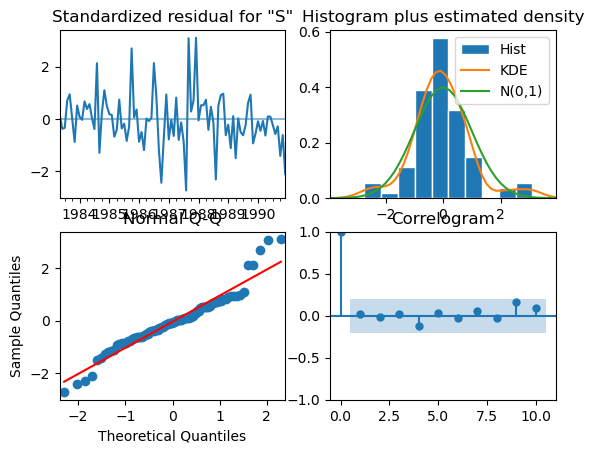

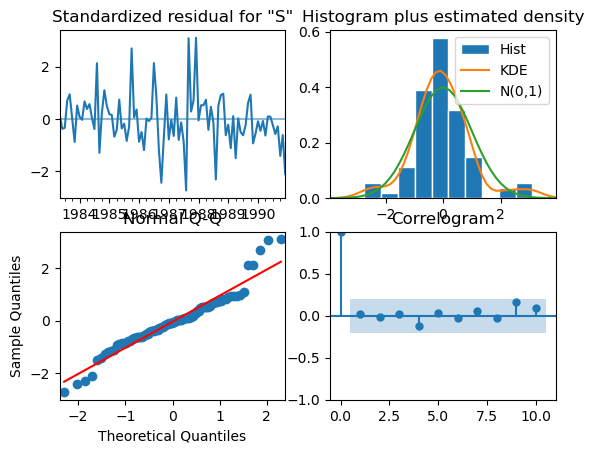

In [184]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [185]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [186]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.369555  415.861785     574.295433    2204.443677
1991-02-01  1224.634968  427.862143     386.040577    2063.229359
1991-03-01  1673.318927  428.007176     834.440277    2512.197578
1991-04-01  1533.325981  432.772828     685.106824    2381.545138
1991-05-01  1425.955866  435.886200     571.634613    2280.277119

In [187]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2233475304798 
MAPE: 25.8696099888637


In [188]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)             1299.980250  47.09988
ARIMA(0,1,0)             1299.980250  47.09988
SARIMA(3,1,1)(3,0,2,12)   601.223348  25.86961

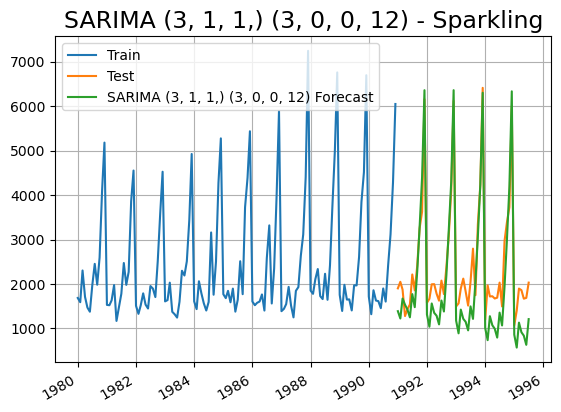

In [189]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

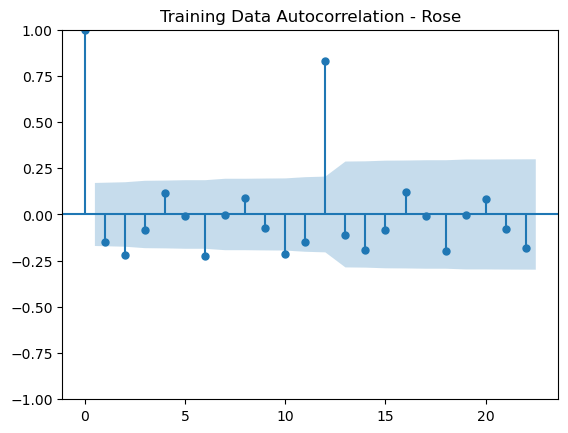

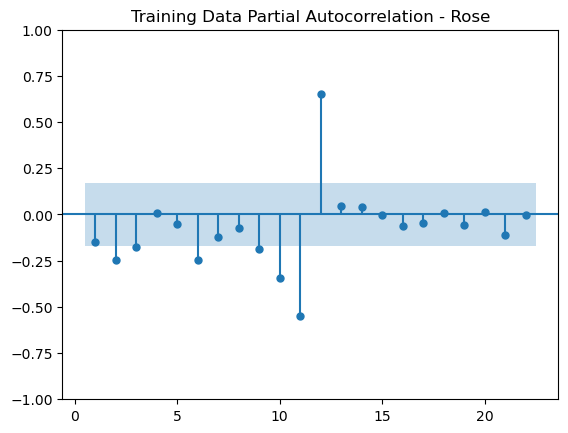

In [190]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [191]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.16337D+00    |proj g|=  3.36290D-02

At iterate    5    f=  6.15149D+00    |proj g|=  4.79029D-04

At iterate   10    f=  6.15149D+00    |proj g|=  1.87920D-03

At iterate   15    f=  6.15112D+00    |proj g|=  2.33401D-02

At iterate   20    f=  6.14522D+00    |proj g|=  7.02967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   2.462D-06   6.145D+00
  F =   6.1451681470427237     

CONVERG

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [192]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49799D+00    |proj g|=  1.54092D-01

At iterate    5    f=  5.47923D+00    |proj g|=  2.78393D-02

At iterate   10    f=  5.47762D+00    |proj g|=  1.77814D-03

At iterate   15    f=  5.47755D+00    |proj g|=  5.41434D-05

At iterate   20    f=  5.47754D+00    |proj g|=  7.91196D-04

At iterate   25    f=  5.47729D+00    |proj g|=  8.30369D-03

At iterate   30    f=  5.47724D+00    |proj g|=  1.88487D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [193]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88198D+00    |proj g|=  1.73914D-01


/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  4.85342D+00    |proj g|=  2.41550D-02

At iterate   10    f=  4.85241D+00    |proj g|=  1.10392D-02

At iterate   15    f=  4.84688D+00    |proj g|=  6.65363D-02

At iterate   20    f=  4.83758D+00    |proj g|=  2.72037D-03

At iterate   25    f=  4.83757D+00    |proj g|=  2.15595D-04

At iterate   30    f=  4.83754D+00    |proj g|=  5.14789D-03

At iterate   35    f=  4.83627D+00    |proj g|=  3.60876D-02

At iterate   40    f=  4.83565D+00    |proj g|=  5.42880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   2.160D-05   4.836D+00
  F =   4.83563271979

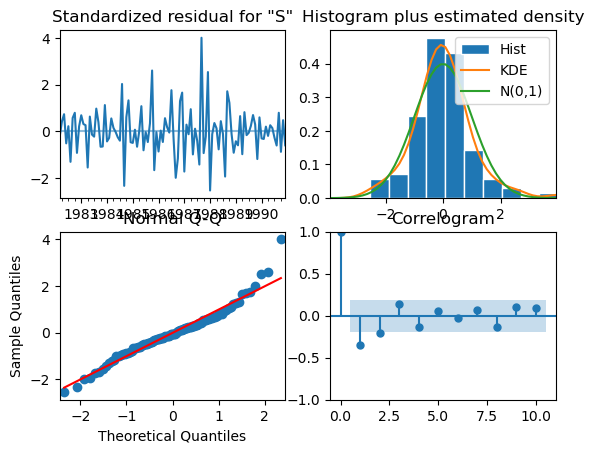

In [194]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

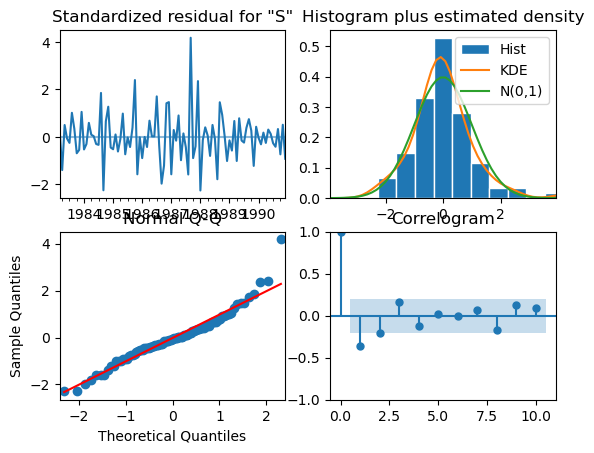

In [195]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

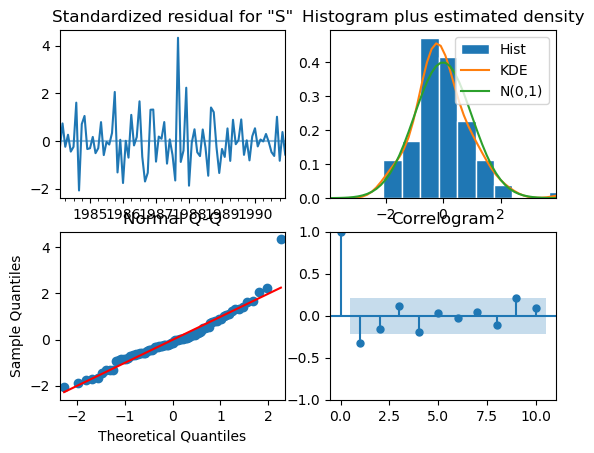

In [196]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

### Predict on the Test Set using this model and evaluate the model.

In [197]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [198]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357994987527 
MAPE: 54.87253648382994


In [199]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.7267061527975 
MAPE: 81.7852267694254


In [200]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.6476829649152 
MAPE: 71.56626315471142


In [201]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE       MAPE
ARIMA(2,1,2)             1299.980250  47.099880
ARIMA(0,1,0)             1299.980250  47.099880
SARIMA(3,1,1)(3,0,2,12)   601.223348  25.869610
SARIMA(0,1,0)(3,1,2,12)  1189.835799  54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.726706  81.785227
SARIMA(0,1,0)(3,1,2,12)  1551.647683  71.566263

In [202]:
resultsR0 = resultsDf.copy()

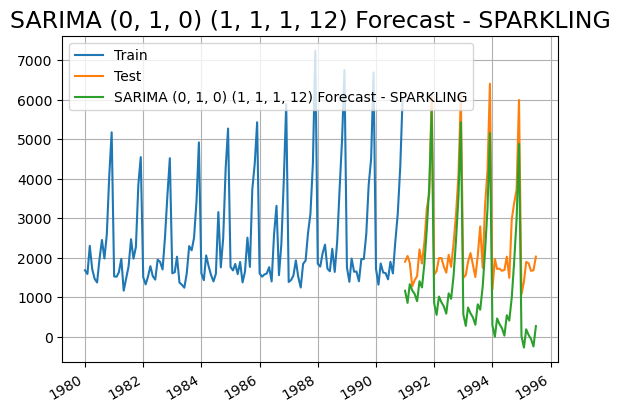

In [203]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

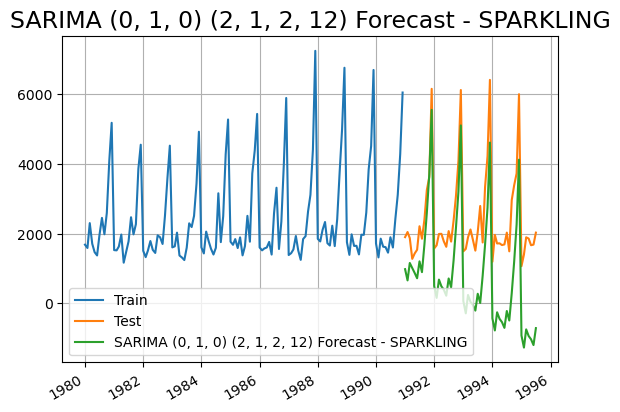

In [204]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

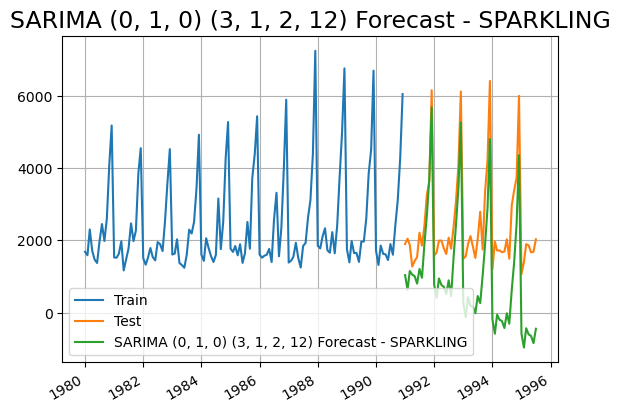

In [205]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [209]:
full_data_model = sm.tsa.statespace.SARIMAX(dfs['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85037D+00    |proj g|=  1.19080D-01

At iterate    5    f=  5.82986D+00    |proj g|=  2.93354D-02

At iterate   10    f=  5.82693D+00    |proj g|=  5.81552D-03

At iterate   15    f=  5.82617D+00    |proj g|=  1.09082D-02

At iterate   20    f=  5.82595D+00    |proj g|=  7.59718D-03

At iterate   25    f=  5.82582D+00    |proj g|=  8.52089D-03

At iterate   30    f=  5.82578D+00    |proj g|=  4.90764D-04

At iterate   35    f=  5.82569D+00    |proj g|=  7.80147D-03

At iterate   40    f=  5.81960D+00    |proj g|=  2.85641D-02

At iterate   45    f=  5.80682D+00    |proj g|=  2.48520D-02

At iterate   50    f=  5.80607D+00    |proj g|=  2.40081D-03

At iterate   55    f=  5.80603D+00    |proj g|=  1.87390D-03

At iterate   60    f=  5.80602D+00    |proj g|=  6.47237D-05

           * * *

Tit   = 

### Evaluate the model on the whole data and predict 12 months into the future

In [210]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [211]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  2132.779585  373.933893    1399.882623    2865.676547
1995-09-01  2359.398072  379.074728    1616.425257    3102.370887
1995-10-01  3266.883054  379.150039    2523.762634    4010.003475
1995-11-01  4040.248465  381.486607    3292.548454    4787.948476
1995-12-01  6101.118957  381.593789    5353.208874    6849.029041

In [212]:
rmse = mean_squared_error(dfs['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 568.7897842015046


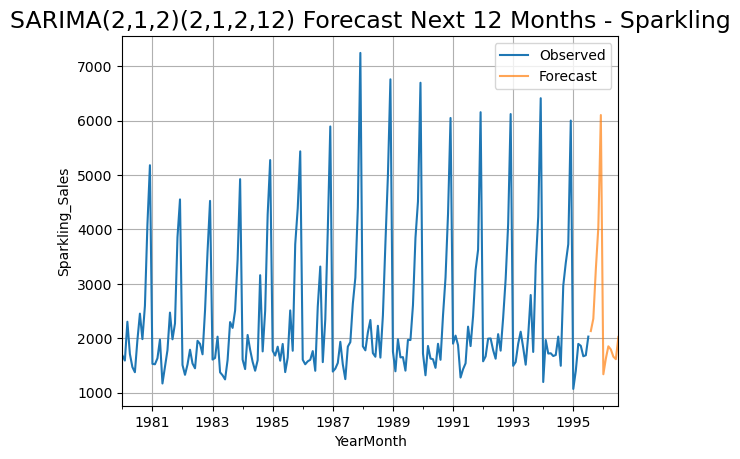

In [214]:
axis = dfs['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Sparkling', fontsize=17);
plt.savefig('Sparkling_forecast.jpg', bbox_inches='tight');

In [215]:
resultsDf

RMSE       MAPE
ARIMA(2,1,2)             1299.980250  47.099880
ARIMA(0,1,0)             1299.980250  47.099880
SARIMA(3,1,1)(3,0,2,12)   601.223348  25.869610
SARIMA(0,1,0)(3,1,2,12)  1189.835799  54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.726706  81.785227
SARIMA(0,1,0)(3,1,2,12)  1551.647683  71.566263

In [216]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [217]:
results_all_spark = pd.concat([resultsDf17, resultsS0], axis=0)
results_all_spark

Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                3949.931298   
Triple Exponential Smoothing (Additive Season)               378.944325   
Triple Exponential Smoothing (Multiplicative Se...           403.125867   
Triple Exponential Smoothing (Additive Season, ...           378.944325   
Triple Exponential Smoothing (Multiplicative Se...           352.464674   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE       MAPE  
RegressionOnTime                                            NaN        NaN  
NaiveModel                                                  NaN        NaN  
SimpleAverageModel                                          NaN        NaN  
2pointTrailingMovingAverage                                 NaN        NaN  
4pointTrailingMovingAverage                                 NaN        NaN  
6pointTrailingMovingAverage                                 NaN        NaN  
9pointTrailingMovingAverage                                 NaN        NaN  
Simple Exponential Smoothing                                NaN        NaN  
Double Exponential Smoothing                                NaN        NaN  
Triple Exponential Smoothing (Additive Season)              NaN        NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN        NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN        NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN        NaN  
ARIMA(2,1,2)                                        1299.980250  47.099880  
ARIMA(0,1,0)                                        1299.980250  47.099880  
SARIMA(3,1,1)(3,0,2,12)                              601.223348  25.869610  
SARIMA(0,1,0)(3,1,2,12)                             1189.835799  54.872536  
SARIMA(0,1,0)(2,1,2,12)                             1757.726706  81.785227  
SARIMA(0,1,0)(3,1,2,12)                             1551.647683  71.566263

In [218]:
results_all_spark.to_csv('results_all_spark.csv')

## Business Insights and Recommendations

### Data Integrity & Preprocessing:

We've successfully loaded the dataset "Sparkling.csv".

Our thorough Exploratory Data Analysis (EDA) reveals no missing values or outliers, ensuring the data's integrity for modeling.

### Data Segmentation:

We've divided the data into training and testing segments.
The training data encompasses all records up to the end of 1990, while the test data spans from the beginning of 1991 up to the most recent timestamp.

### Model Development & Evaluation:

We've built and evaluated several forecasting models to understand the sales dynamics of Sparkling Wine:

* Linear Regression
* Naive Model
* Simple Average
* Simple Exponential
* Trailing Moving Average
* Double Exponential
* Triple Exponential

For each model, the Root Mean Square Error (RMSE) was employed as the evaluation metric to assess prediction accuracy.

### Automated Forecasting:

We've successfully implemented an automated ARIMA/SARIMA model, which offers adaptive forecasting based on the historical sales patterns.

### Choosing the Right Forecasting Model:

A variety of forecasting algorithms can be employed depending on the business requirements and data complexity.
While advanced models like ARIMA can deduce intricate data patterns, simpler models may suffice for straightforward time series forecasting.
Our recommendation is to lean towards simpler models when the analysis is uncomplicated, ensuring ease of interpretation and application.

### Seasonal Insights:

December emerges as a high-demand month for Sparkling Wine, witnessing a surge in sales compared to other months.
Aligning marketing and inventory strategies with these seasonal trends can enhance profitability.

### Promotional Strategies:
Organizing in-store tastings and events can significantly boost customer engagement and drive sales.
Leveraging these promotional strategies, especially during peak demand periods, can optimize sales outcomes.

### Historical Sales Patterns:

Notably, in the years 1981, 1983, and 1994, Sparkling Wine sales remained consistent in October and November.
However, post this period, sales began to fluctuate. It's crucial to delve deeper into the factors causing these fluctuations to ensure sustained sales growth.

__________